## Data descriptions:
doi: 10.24432/C5002N
<br><br>AP (Atmospheric Pressure) Feature,	Continuous, (range 992.89-1033.30 milibar)	units:milibar
<br>RH	(Relative Humidity) Feature,	Continuous, (range 25.56% to 100.16%)	units:%
<br>AT	(Ambient Temperature) Feature,	Continuous,	(range 1.81°C and 37.11°C)	units: C
<br>V (Exhaust Vacuum)	Feature	Continuous (range 25.36-81.56 cm Hg)        	units: cm Hg
<br><br>PE	(Net hourly electrical output of the plant) Target,	Continuous,	(range 420.26-495.76 MW)	units:MW
 
<b><u>combined cycle power plant:</b></u>
<br>-electricity of the plant is generated by steam,gas turbines, and returned heat
<br>-the vacuum is colected from and has effect on the steam turbine
<br>-ambient variables affect gas turbine performance


## Project goal:
use environment features to predict net hourly electrical energy output of the plant (EP)

In [1]:
### Libraries for Machine Learning
import pandas as pd
import numpy as np
import statistics as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from statsmodels.stats import anova
from sklearn.metrics import explained_variance_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

In [2]:
df = pd.read_csv('CombinedCyclePowerPlant.csv', sep=',')
df.head()
df.columns=['Ambient_Temperature','Vacuum','Atmospheric_Pressure','Relative_Humidity','Electrical_Power_Output']

In [3]:
import statsmodels.api as sm
X = df.drop('Electrical_Power_Output',axis=1)
y = df['Electrical_Power_Output']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                               OLS Regression Results                              
Dep. Variable:     Electrical_Power_Output   R-squared:                       0.929
Model:                                 OLS   Adj. R-squared:                  0.929
Method:                      Least Squares   F-statistic:                 3.114e+04
Date:                     Thu, 17 Oct 2024   Prob (F-statistic):               0.00
Time:                             04:19:13   Log-Likelihood:                -28088.
No. Observations:                     9568   AIC:                         5.619e+04
Df Residuals:                         9563   BIC:                         5.622e+04
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [4]:
df_features=df.drop(columns=['Electrical_Power_Output','Vacuum','Relative_Humidity'])
X=df_features
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,7.829207,Ambient_Temperature
1,7.829207,Atmospheric_Pressure


In [5]:
model = LinearRegression()
X = df_features
y = df['Electrical_Power_Output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

y_pred=est2.predict(sm.add_constant(X_test))
### Calculate the Adjusted R2
r2 = r2_score(y_test, y_pred)
n = len(X_test)
p = len(X_test.columns)
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
print('R2:', r2)

                               OLS Regression Results                              
Dep. Variable:     Electrical_Power_Output   R-squared:                       0.900
Model:                                 OLS   Adj. R-squared:                  0.900
Method:                      Least Squares   F-statistic:                 3.456e+04
Date:                     Thu, 17 Oct 2024   Prob (F-statistic):               0.00
Time:                             04:19:16   Log-Likelihood:                -23767.
No. Observations:                     7654   AIC:                         4.754e+04
Df Residuals:                         7651   BIC:                         4.756e+04
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [6]:
## GLM
import statsmodels.formula.api as smf
X = df_features
y = df['Electrical_Power_Output']
# interacrtion term
df['Ambient_Temperature*Atmospheric_Pressure'] = df['Ambient_Temperature']*df['Atmospheric_Pressure']



est = smf.glm(formula='Electrical_Power_Output ~ Ambient_Temperature + Atmospheric_Pressure + Ambient_Temperature:Atmospheric_Pressure', data=df, family=sm.families.Gaussian()).fit()
print(est.summary())


                    Generalized Linear Model Regression Results                    
Dep. Variable:     Electrical_Power_Output   No. Observations:                 9568
Model:                                 GLM   Df Residuals:                     9564
Model Family:                     Gaussian   Df Model:                            3
Link Function:                    Identity   Scale:                          28.899
Method:                               IRLS   Log-Likelihood:                -29667.
Date:                     Thu, 17 Oct 2024   Deviance:                   2.7639e+05
Time:                             04:19:17   Pearson chi2:                 2.76e+05
No. Iterations:                          3   Pseudo R-squ. (CS):             0.9999
Covariance Type:                 nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------

In [7]:
## GLM
import statsmodels.formula.api as smf
X = df_features
y = df['Electrical_Power_Output']
# interacrtion term
df['Ambient_Temperature*Vacuum'] = df['Ambient_Temperature']*df['Vacuum']




est = smf.glm(formula='Electrical_Power_Output ~ Ambient_Temperature + Atmospheric_Pressure+Vacuum + Ambient_Temperature:Vacuum', data=df, family=sm.families.Gaussian()).fit()
print(est.summary())

                    Generalized Linear Model Regression Results                    
Dep. Variable:     Electrical_Power_Output   No. Observations:                 9568
Model:                                 GLM   Df Residuals:                     9563
Model Family:                     Gaussian   Df Model:                            4
Link Function:                    Identity   Scale:                          21.011
Method:                               IRLS   Log-Likelihood:                -28142.
Date:                     Thu, 17 Oct 2024   Deviance:                   2.0093e+05
Time:                             04:19:18   Pearson chi2:                 2.01e+05
No. Iterations:                          3   Pseudo R-squ. (CS):              1.000
Covariance Type:                 nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------

## Building the model:

**Base Class of the model** is built for the following steps:

- Split the data into training and testing data

- Fit the model selected

- Predict the model
    
- Evaluate the model

- Plot the residuals

- Plot the residuals vs predictor plot



Base Class takes the following **parameters**:

- **X: Independent variables**

- **y: Dependent variable**

- **test_size: The proportion of the dataset to include in the test split. Default is 0.2**

- **random_state: Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls. Default is 42**

- **val_size: The proportion of the dataset from the remaining training to include in the validation split. Default is 0.25**

    Example:
    * if the test_size is 0.2 and val_size is 0.25, then the data is split into 60% training, 20% testing, and 20% validation.
    * if the test_size is 0.2 and val_size is 0.3, then the data is split into 56% training, 20% testing, and 24% validation.
        

- **model: The model to be used. Default is LinearRegression**
Supported models are LinearRegression,OLS,DesicionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,SVR,BaggingRegressor,MLPRegressor

Darin - WIP 
1) make show outliers were removed by showing index no longer present - DONE
2) remove and compare outlier removed to with outliers - DONE
3) try different scaling factors for the function (1.0, 1.5) -DONE


<br><br>
4) fix prediciont plot
<br>5) WIP where are the test and train sizes being defined - IN THE BASE CLASS FOR MODEL SECTION
<br>6) where can I make predictions?
<br>7) why are the results different in the loop when compared to individual output?

In [8]:
############################################################################################################
#
#   Base Class for the Model
#
############################################################################################################
class Model:
    def __init__(self,X,y,test_size=0.2,random_state=42,val_size=0.25,model="LinearRegression"):
        '''
        Parameters:
        X: Features
        y: Target
        test_size: Test size
        random_state: Random state
        val_size: Validation size
        model: Model to be used
        '''
        self.model_name = model
        self.models = {
            "LinearRegression": {
                "model": lambda X, y: LinearRegression(),
                "fit": lambda X, y: self.model.fit(X, y)
            },
            "OLS": {
                "model":lambda X, y: sm.OLS(y, X),
                "fit": lambda X, y: self.model.fit()
            },
            "DecisionTreeRegressor": {
                "model": lambda X, y: DecisionTreeRegressor(),
                "fit": lambda X, y: self.model.fit(X, y)
            },
            "RandomForestRegressor": {
                "model": lambda X, y: RandomForestRegressor(),
                "fit": lambda X, y: self.model.fit(X, y)
            },
            "GradientBoostingRegressor": {
                "model": lambda X, y: GradientBoostingRegressor(),
                "fit": lambda X, y: self.model.fit(X, y)
            },
            "AdaBoostRegressor": {
                "model": lambda X, y: AdaBoostRegressor(),
                "fit": lambda X, y: self.model.fit(X, y)
            },
            "BaggingRegressor": {
                "model": lambda X, y: BaggingRegressor(),
                "fit": lambda X, y: self.model.fit(X, y)
            },
            "SVR": {
                "model": lambda X, y: SVR(),
                "fit": lambda X, y: self.model.fit(X, y)
            }
            ,
            "MLPRegressor": {
                "model": lambda X, y: MLPRegressor(),
                "fit": lambda X, y: self.model.fit(X, y)
            }
        }
        self.X = X
        self.y = y
        self.test_size = test_size
        self.random_state = random_state
        self.val_size = val_size
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=self.test_size, random_state=self.random_state)
        self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(self.X_train, self.y_train, test_size=self.val_size, random_state=self.random_state)
        self.model = self.models[self.model_name]['model'](self.X_train, self.y_train)

    @staticmethod
    def get_models():
        return ["LinearRegression", "OLS","DecisionTreeRegressor", "RandomForestRegressor", "GradientBoostingRegressor", "AdaBoostRegressor", "BaggingRegressor", "SVR", "MLPRegressor"]

    def train(self):
        self.model=self.models[self.model_name]['fit'](self.X_train, self.y_train)
        return self.evaluate(self.X_train, self.y_train)

    def predict(self, X):
        return self.model.predict(X)
    
    def validate(self):
        return self.evaluate(self.X_val, self.y_val)
    
    def test(self):
        return self.evaluate(self.X_test, self.y_test)

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        mse = mean_squared_error(y, y_pred)
        mae = mean_absolute_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        return np.round((mse, mae, r2), decimals=2)
    
    def summary(self):
        return self.model.summary()
    
    def plotResiduals(self, X, y):
        residuals = y - self.predict(X)
        sns.scatterplot(x=self.predict(X), y=residuals)
        plt.xlabel('Predictions')
        plt.ylabel('Residuals')
        plt.axhline(y=0, color='r', linestyle='--')
        plt.title('Residuals vs. Predictions')
        plt.show()

    def plot_residuals(self):
        self.plotResiduals(self.X_val, self.y_val)
    
    def plot_residuals_test(self):
        self.plotResiduals(self.X_test, self.y_test)

    def plot_residuals_val(self):
        self.plotResiduals(self.X_val, self.y_val)


# Best variable combination checks (df):

In [9]:
df.head()

,Ambient_Temperature,Vacuum,Atmospheric_Pressure,Relative_Humidity,Electrical_Power_Output,Ambient_Temperature*Atmospheric_Pressure,Ambient_Temperature*Vacuum
0,8.34,40.77,1010.84,90.01,480.48,8430.4056,340.0218
1,23.64,58.49,1011.40,74.20,445.75,23909.4960,1382.7036
2,29.74,56.90,1007.15,41.91,438.76,29952.6410,1692.2060
3,19.07,49.69,1007.22,76.79,453.09,19207.6854,947.5883
4,11.80,40.66,1017.13,97.20,464.43,12002.1340,479.7880


In [9]:
from itertools import combinations
X = df.drop(columns=['Electrical_Power_Output']) # exclude the targetA
cols = X.columns
for i in range(1, len(cols)+1):
    for comb in combinations(cols, i):
        X = df[list(comb)]
        model = Model(X, y)
        mse, mae, r2=model.train()
        print('----------------------------------------------')
        print(f'Train Metrics: Features: {comb}, MSE: {mse}, MAE: {mae}, R2: {r2}')
        mse, mae, r2=model.validate()
        print(f'Validation Metrics Features: {comb}, MSE: {mse}, MAE: {mae}, R2: {r2}')
        print('----------------------------------------------')

----------------------------------------------
Train Metrics: Features: ('Ambient_Temperature',), MSE: 29.87, MAE: 4.32, R2: 0.9
Validation Metrics Features: ('Ambient_Temperature',), MSE: 29.15, MAE: 4.24, R2: 0.9
----------------------------------------------
----------------------------------------------
Train Metrics: Features: ('Vacuum',), MSE: 68.32, MAE: 6.49, R2: 0.76
Validation Metrics Features: ('Vacuum',), MSE: 79.11, MAE: 6.92, R2: 0.74
----------------------------------------------
----------------------------------------------
Train Metrics: Features: ('Atmospheric_Pressure',), MSE: 211.24, MAE: 11.92, R2: 0.27
Validation Metrics Features: ('Atmospheric_Pressure',), MSE: 221.41, MAE: 12.08, R2: 0.28
----------------------------------------------
----------------------------------------------
Train Metrics: Features: ('Relative_Humidity',), MSE: 245.0, MAE: 13.18, R2: 0.15
Validation Metrics Features: ('Relative_Humidity',), MSE: 254.71, MAE: 13.33, R2: 0.17
--------------

In [10]:
# for all combinations of columns
from itertools import combinations
X = df.drop(columns=['Electrical_Power_Output']) # exclude the target
cols = X.columns
# Store the results in  matrix
best_combinations=[]
for trial in range(100):
    results = {}
    for i in range(2, len(cols)+1):
        for comb in combinations(cols, i):
            X = df[list(comb)]
            model = Model(X, y,random_state=np.random.randint(0,100))
            model.train()
            mse, mae, r2=model.validate()
            # print(f'Columns: {comb}, MSE: {mse}, MAE: {mae}, R2: {r2}')
            results[comb] = (mse, mae, r2)
    # Find the best combination
    best_comb = min(results, key=results.get)
    # print(f'Best combination: {best_comb}, MSE: {results[best_comb][0]}, MAE: {results[best_comb][1]}, R2: {results[best_comb][2]}')
    best_combinations.append(best_comb)

Text(0.5, 1.0, 'Most common combination of Featues')

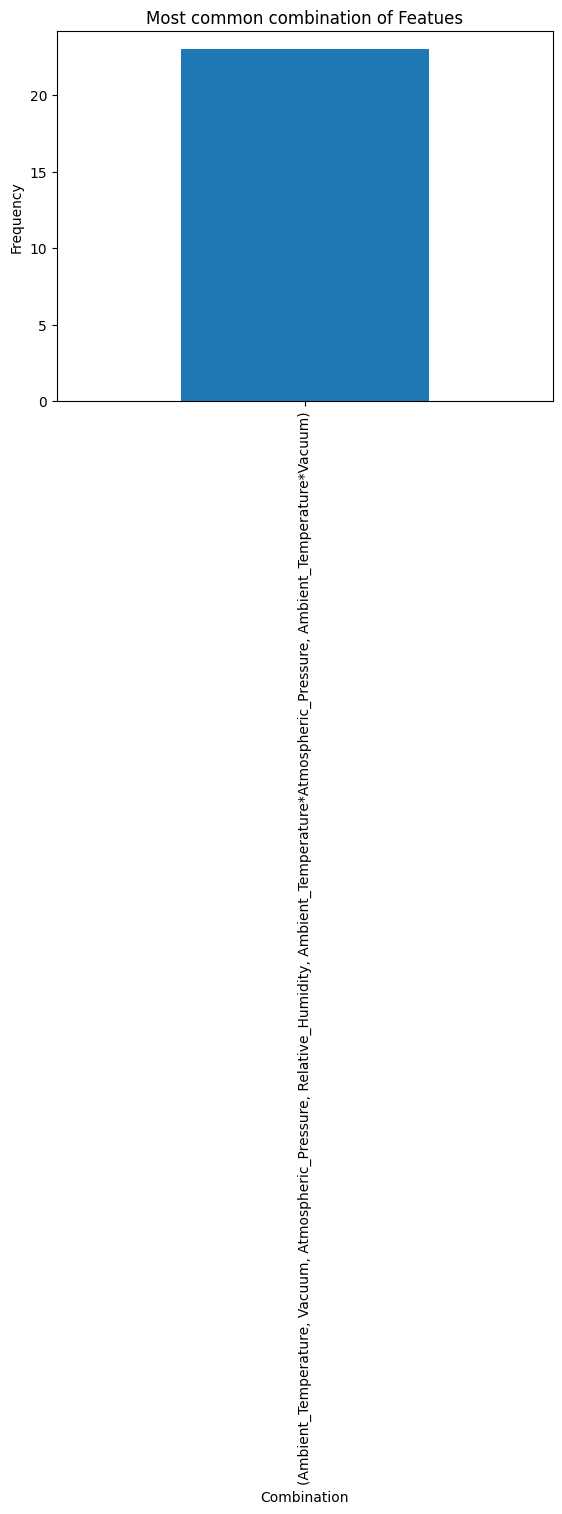

In [11]:
# Plot best variable combination
pd.DataFrame(best_combinations).value_counts().plot(kind='bar')
plt.xlabel('Combination')
plt.ylabel('Frequency')
plt.title('Most common combination of Featues')

In [12]:
# Best combination base line
X = df[['Ambient_Temperature', 'Vacuum', 'Atmospheric_Pressure', 'Relative_Humidity']]
model = Model(X, y)
model.train()
model.validate()
mse, mae, r2=model.test()
print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')

MSE: 19.6, MAE: 3.55, R2: 0.93


# Single Model check:

In [13]:
## Test the model with OLS
X = df[['Ambient_Temperature', 'Vacuum', 'Atmospheric_Pressure', 'Relative_Humidity']]
y = df['Electrical_Power_Output']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Electrical_Power_Output   R-squared:                       0.929
Model:                                 OLS   Adj. R-squared:                  0.929
Method:                      Least Squares   F-statistic:                 3.114e+04
Date:                     Thu, 17 Oct 2024   Prob (F-statistic):               0.00
Time:                             04:03:02   Log-Likelihood:                -28088.
No. Observations:                     9568   AIC:                         5.619e+04
Df Residuals:                         9563   BIC:                         5.622e+04
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  454.6093      9.749     46.634      0.000     435.500     473.718
Ambient_Temperature     -1.9775      0.015   -129.342      0.000      -2.007      -1.948
Vacuum                  -0.2339      0.007    -32.122      0.000      -0.248      -0.220
Atmospheric_Pressure     0.0621      0.009      6.564      0.000       0.044       0.081
Relative_Humidity       -0.1581      0.004    -37.918      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
### Fit the model with 
model = Model(X, y, model="OLS")
model.train()
mse, mae, r2=model.validate()
print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')

MSE: 22.03, MAE: 3.7, R2: 0.93


In [15]:
X = df[['Ambient_Temperature', 'Atmospheric_Pressure', 'Relative_Humidity']]
y = df['Electrical_Power_Output']
model = Model(X, y, model="LinearRegression", random_state=42)
model.train()
mse, mae, r2=model.test()
print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')

MSE: 21.78, MAE: 3.71, R2: 0.92


In [16]:
X=df.drop(columns=['Electrical_Power_Output'])
model = Model(X, y, model="LinearRegression", random_state=42)
model.train()
mse, mae, r2=model.validate()
print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')


MSE: 19.43, MAE: 3.45, R2: 0.94


In [17]:
model = Model(X, y, model="DecisionTreeRegressor", random_state=42)
model.train()
mse, mae, r2=model.validate()
print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')

MSE: 22.63, MAE: 3.32, R2: 0.93


# Multiple Model comparison:

In [19]:
for model_name in Model.get_models():
    model = Model(X, y, model=model_name)
    train_results=model.train()
    validation_results=model.validate()
    test_results=model.test()
    #print(f'| {model_name} | {train_results[0]}| {train_results[1]}|{train_results[2]}| {validation_results[0]}|{validation_results[1]}|{validation_results[2]} | {test_results[0]}| {test_results[1]}|{test_results[0]}|')
    print(f'<tr><td>{model_name}</td><td>{train_results[0]}</td><td>{train_results[1]}</td><td>{train_results[2]}</td><td>{validation_results[0]}</td><td>{validation_results[1]}</td><td>{validation_results[2]}</td><td>{test_results[0]}</td><td>{test_results[1]}</td><td>{test_results[2]}</td></tr>')


<tr><td>LinearRegression</td><td>18.92</td><td>3.42</td><td>0.93</td><td>19.43</td><td>3.45</td><td>0.94</td><td>17.73</td><td>3.33</td><td>0.94</td></tr>
<tr><td>OLS</td><td>20.71</td><td>3.62</td><td>0.93</td><td>21.25</td><td>3.65</td><td>0.93</td><td>19.28</td><td>3.52</td><td>0.93</td></tr>
<tr><td>DecisionTreeRegressor</td><td>0.0</td><td>0.0</td><td>1.0</td><td>22.66</td><td>3.35</td><td>0.93</td><td>22.06</td><td>3.29</td><td>0.92</td></tr>
<tr><td>RandomForestRegressor</td><td>1.81</td><td>0.95</td><td>0.99</td><td>12.79</td><td>2.61</td><td>0.96</td><td>11.65</td><td>2.49</td><td>0.96</td></tr>
<tr><td>GradientBoostingRegressor</td><td>13.46</td><td>2.81</td><td>0.95</td><td>16.35</td><td>3.08</td><td>0.95</td><td>14.54</td><td>2.95</td><td>0.95</td></tr>
<tr><td>AdaBoostRegressor</td><td>27.87</td><td>4.21</td><td>0.9</td><td>32.54</td><td>4.43</td><td>0.89</td><td>27.84</td><td>4.18</td><td>0.9</td></tr>
<tr><td>BaggingRegressor</td><td>2.5</td><td>1.06</td><td>0.99</td><td

### Results:

<table>
    <tr>
        <td style="font-weight:bold">Model</td>
        <td colspan="3" style="font-weight:bold">Train</td>
         <td colspan="3" style="font-weight:bold">Test</td>
          <td colspan="3" style="font-weight:bold">Validation</td>
    </tr>
    <tr>
        <td></td>
        <td>MSE</td>
        <td>MAE</td>
        <td>R2</td>
        <td>MSE</td>
        <td>MAE</td>
        <td>R2</td>
        <td>MSE</td>
        <td>MAE</td>
        <td>R2</td>
    </tr>
    <tr>
        <td>LinearRegression</td>
        <td>20.76</td>
        <td>3.64</td>
        <td>0.93</td>
        <td>19.60</td>
        <td>3.55</td>
        <td>0.93</td>
        <td>22.03</td>
        <td>3.70</td>
        <td>0.93</td>
    </tr>
    <tr>
        <td>OLS</td>
        <td>25.49</td>
        <td>4.03</td>
        <td>0.91</td>
        <td>24.18</td>
        <td>3.94</td>
        <td>0.92</td>
        <td>26.86</td>
        <td>4.08</td>
        <td>0.91</td>
    </tr>
    <tr>
        <td style="font-weight:bold"><b>DecisionTreeRegressor<b></td>
        <td>0.00</td>
        <td>0.00</td>
        <td style="font-weight:bold"><b>1.00<b></td>
        <td>20.51</td>
        <td>3.14</td>
        <td>0.93</td>
        <td>21.05</td>
        <td>3.18</td>
        <td>0.93</td>
    </tr>
    <tr>
        <td style="font-weight:bold">RandomForestRegressor</td>
        <td>1.68</td>
        <td>0.92</td>
        <td>0.99</td>
        <td>10.73</td>
        <td>2.36</td>
        <td style="font-weight:bold">0.96</td>
        <td>12.06</td>
        <td>2.52</td>
        <td style="font-weight:bold">0.96</td>
    </tr>
    <tr>
        <td>GradientBoostingRegressor</td>
        <td>13.47</td>
        <td>2.80</td>
        <td>0.95</td>
        <td>14.25</td>
        <td>2.90</td>
        <td>0.95</td>
        <td>16.43</td>
        <td>3.09</td>
        <td>0.95</td>
    </tr>
    <tr>
        <td>AdaBoostRegressor</td>
        <td>28.29</td>
        <td>4.26</td>
        <td>0.90</td>
        <td>27.19</td>
        <td>4.15</td>
        <td>0.90</td>
        <td>32.53</td>
        <td>4.44</td>
        <td>0.89</td>
    </tr>
    <tr>
        <td>BaggingRegressor</td>
        <td>2.47</td>
        <td>1.02</td>
        <td>0.99</td>
        <td>11.79</td>
        <td>2.52</td>
        <td>0.96</td>
        <td>13.24</td>
        <td>2.63</td>
        <td>0.96</td>
    </tr>
<tr><td>SVR</td><td>207.92</td><td>12.12</td><td>0.28</td><td>228.19</td><td>12.59</td><td>0.25</td><td>207.55</td><td>12.05</td><td>0.27</td></tr>
<tr><td>MLPRegressor</td><td>23.4</td><td>3.82</td><td>0.92</td><td>24.04</td><td>3.86</td><td>0.92</td><td>22.38</td><td>3.76</td><td>0.92</td></tr>

</table>


# Test size check:

In [ ]:
for i in range(1,11):
    model=Model(X, y, model="RandomForestRegressor",test_size=0.2+ (0.02*i),random_state=42,val_size=0.25)
    model.train()
    model.test()
    mse, mae, r2=model.validate()
    print(f'Model: RandomForestRegressor, MSE: {mse}, MAE: {mae}, R2: {r2} for test_size: {0.2+ (0.02*i)}')

# Binned PE outlier removal:
#### creates df_outliers_removed
df.columns=['Ambient_Temperature','Vacuum','Atmospheric_Pressure','Relative_Humidity','Electrical_Power_Output']

In [18]:
# Function to remove outliers from target var, based on feature
def remove_outliers(df, feature, target):
    # Define Q1,Q3,IQR
    Q1 = df.groupby(feature, observed=False)[target].quantile(0.25)
    Q3 = df.groupby(feature, observed=False)[target].quantile(0.75)
    IQR = Q3 - Q1
    # Define lower and upper limit for removal, adjust scale factor integer as needed
    # Using a scale factor (like IQR) allows for adjustment based on the dataset's characteristics,
    # making the outlier detection process more flexible and context-sensitive
    lower_bound = Q1 - 1.0 * IQR
    upper_bound = Q3 + 1.0 * IQR
    # Merge bounds to original dataframe
    bounds_df = pd.DataFrame({'lower_bound': lower_bound, 'upper_bound': upper_bound})
    df = df.merge(bounds_df, how='left', left_on=feature, right_index=True)
    # Outlier index tracking
    outlier_indices = df[(df[target] < df['lower_bound']) | (df[target] > df['upper_bound'])].index
    # Make dataframe without outliers, keep less than upper and above lower bounds
    df_filtered = df[(df[target] >= df['lower_bound']) & (df[target] <= df['upper_bound'])]
    # Drop the columns with bounds
    df_filtered = df_filtered.drop(['lower_bound', 'upper_bound'], axis=1)

    return df_filtered, outlier_indices

In [19]:
# Function to remove outliers from target var, based on feature
def remove_outliers_higher(df, feature, target):
    # Define Q1,Q3,IQR
    Q1 = df.groupby(feature, observed=False)[target].quantile(0.25)
    Q3 = df.groupby(feature, observed=False)[target].quantile(0.75)
    IQR = Q3 - Q1
    # Define lower and upper limit for removal, adjust scale factor integer as needed
    # Using a scale factor (like IQR) allows for adjustment based on the dataset's characteristics,
    # making the outlier detection process more flexible and context-sensitive
    lower_bound = Q1 - 1.1 * IQR
    upper_bound = Q3 + 1.1 * IQR
    # Merge bounds to original dataframe
    bounds_df = pd.DataFrame({'lower_bound': lower_bound, 'upper_bound': upper_bound})
    df = df.merge(bounds_df, how='left', left_on=feature, right_index=True)
    # Outlier index tracking
    outlier_indices = df[(df[target] < df['lower_bound']) | (df[target] > df['upper_bound'])].index
    # Make dataframe without outliers, keep less than upper and above lower bounds
    df_filtered = df[(df[target] >= df['lower_bound']) & (df[target] <= df['upper_bound'])]
    # Drop the columns with bounds
    df_filtered = df_filtered.drop(['lower_bound', 'upper_bound'], axis=1)

    return df_filtered, outlier_indices

In [20]:
# Function to remove outliers from target var, based on feature
def remove_outliers_lower(df, feature, target):
    # Define Q1,Q3,IQR
    Q1 = df.groupby(feature, observed=False)[target].quantile(0.25)
    Q3 = df.groupby(feature, observed=False)[target].quantile(0.75)
    IQR = Q3 - Q1
    # Define lower and upper limit for removal, adjust scale factor integer as needed
    # Using a scale factor (like IQR) allows for adjustment based on the dataset's characteristics,
    # making the outlier detection process more flexible and context-sensitive
    lower_bound = Q1 - 0.9 * IQR
    upper_bound = Q3 + 0.9 * IQR
    # Merge bounds to original dataframe
    bounds_df = pd.DataFrame({'lower_bound': lower_bound, 'upper_bound': upper_bound})
    df = df.merge(bounds_df, how='left', left_on=feature, right_index=True)
    # Outlier index tracking
    outlier_indices = df[(df[target] < df['lower_bound']) | (df[target] > df['upper_bound'])].index
    # Make dataframe without outliers, keep less than upper and above lower bounds
    df_filtered = df[(df[target] >= df['lower_bound']) & (df[target] <= df['upper_bound'])]
    # Drop the columns with bounds
    df_filtered = df_filtered.drop(['lower_bound', 'upper_bound'], axis=1)

    return df_filtered, outlier_indices

# Bin and remove outliers

In [22]:
######### start of Bin and remove outliers

# Create a copy of the original df to avoid altering it
binned_df = df.copy()

# Feature bin creation in the new dataframe
binned_df['Ambient_Temperature_bin'] = pd.cut(binned_df['Ambient_Temperature'], bins=10)
binned_df['Relative_Humidity_bin'] = pd.cut(binned_df['Relative_Humidity'], bins=10)
binned_df['Atmospheric_Pressure_bin'] = pd.cut(binned_df['Atmospheric_Pressure'], bins=10)
binned_df['Vacuum_bin'] = pd.cut(binned_df['Vacuum'], bins=10)

# List of binned features
binned_features = ['Atmospheric_Pressure_bin', 'Relative_Humidity_bin', 'Ambient_Temperature_bin', 'Vacuum_bin']

df_outliers_removed = binned_df.copy() # copy binned df to remove outliers from
removed_indices = [] # Set an empty list for removed_indices before adding to list

# Apply outlier_removal() to each binned feature
for feature in binned_features:
    df_outliers_removed, outliers = remove_outliers(df_outliers_removed, feature, 'Electrical_Power_Output')
    removed_indices.extend(outliers.tolist())

# Outlier and index checks
print(f"Count of total removed binned PE outliers: {len(removed_indices)}")
remaining_indices = set(removed_indices).intersection(df_outliers_removed.index)
if remaining_indices:
    print(f"Original binned PE outliers remaining after removal: {list(remaining_indices)}")
else:
    print("No original binned PE outliers remaining.")

######### end of Bin and remove outliers

Count of total removed binned PE outliers: 1256
No original binned PE outliers remaining.


In [23]:
df_outliers_removed_higher = binned_df.copy() # copy binned df to remove outliers from
removed_indices = [] # Set an empty list for removed_indices before adding to list

# Apply outlier_removal() to each binned feature
for feature in binned_features:
    df_outliers_removed, outliers = remove_outliers_higher(df_outliers_removed, feature, 'Electrical_Power_Output')
    removed_indices.extend(outliers.tolist())

# Outlier and index checks
print(f"Count of total removed binned PE outliers: {len(removed_indices)}")
remaining_indices = set(removed_indices).intersection(df_outliers_removed.index)
if remaining_indices:
    print(f"Original binned PE outliers remaining after removal: {list(remaining_indices)}")
else:
    print("No original binned PE outliers remaining.")

Count of total removed binned PE outliers: 500
No original binned PE outliers remaining.


In [24]:
df_outliers_removed_lower = binned_df.copy() # copy binned df to remove outliers from
removed_indices = [] # Set an empty list for removed_indices before adding to list

# Apply outlier_removal() to each binned feature
for feature in binned_features:
    df_outliers_removed, outliers = remove_outliers_lower(df_outliers_removed, feature, 'Electrical_Power_Output')
    removed_indices.extend(outliers.tolist())

# Outlier and index checks
print(f"Count of total removed binned PE outliers: {len(removed_indices)}")
remaining_indices = set(removed_indices).intersection(df_outliers_removed.index)
if remaining_indices:
    print(f"Original binned PE outliers remaining after removal: {list(remaining_indices)}")
else:
    print("No original binned PE outliers remaining.")

Count of total removed binned PE outliers: 817
No original binned PE outliers remaining.


#### Plot original binned data

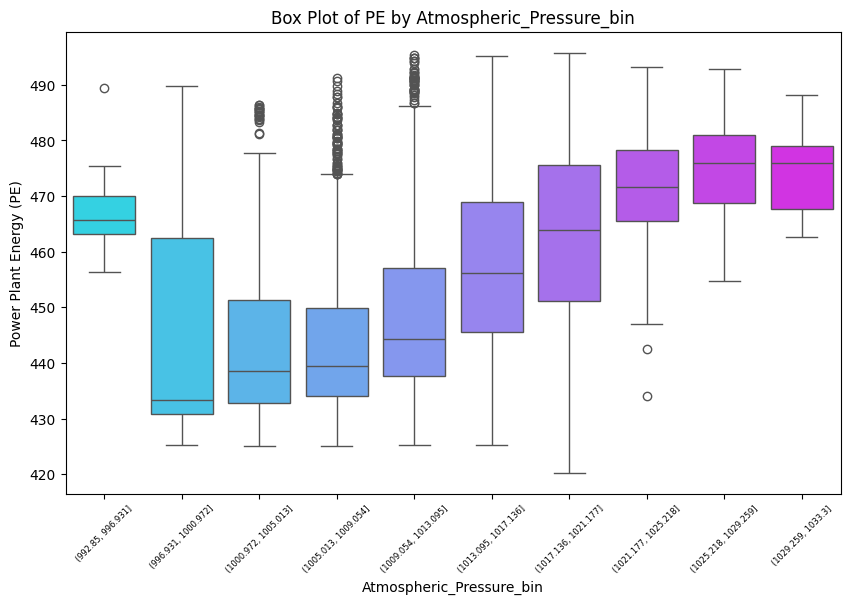

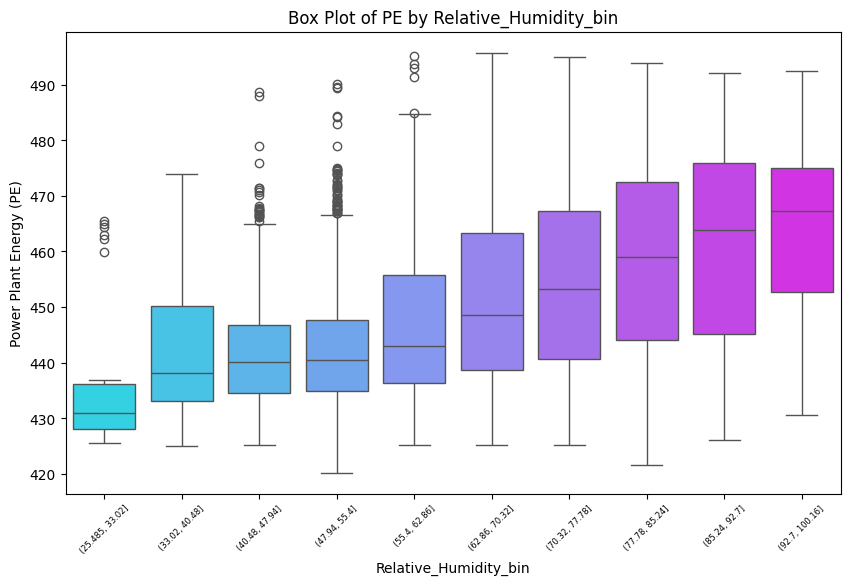

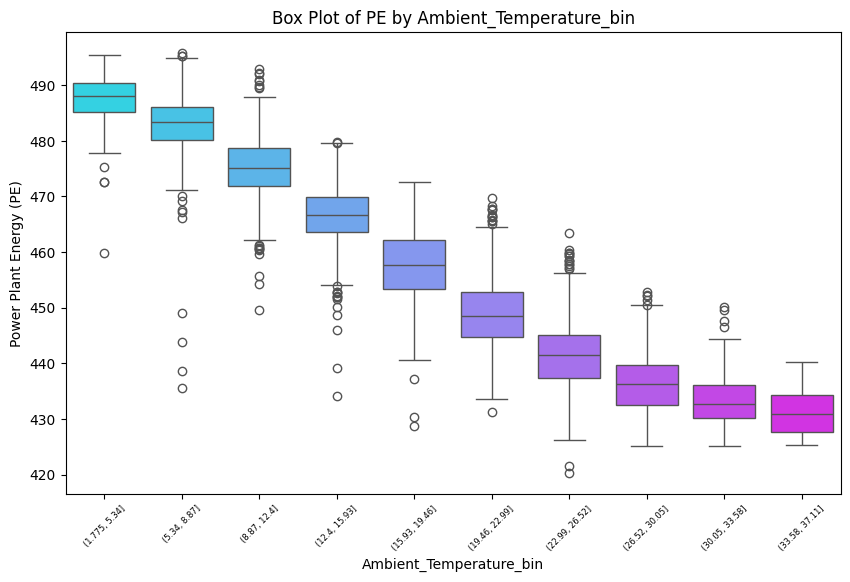

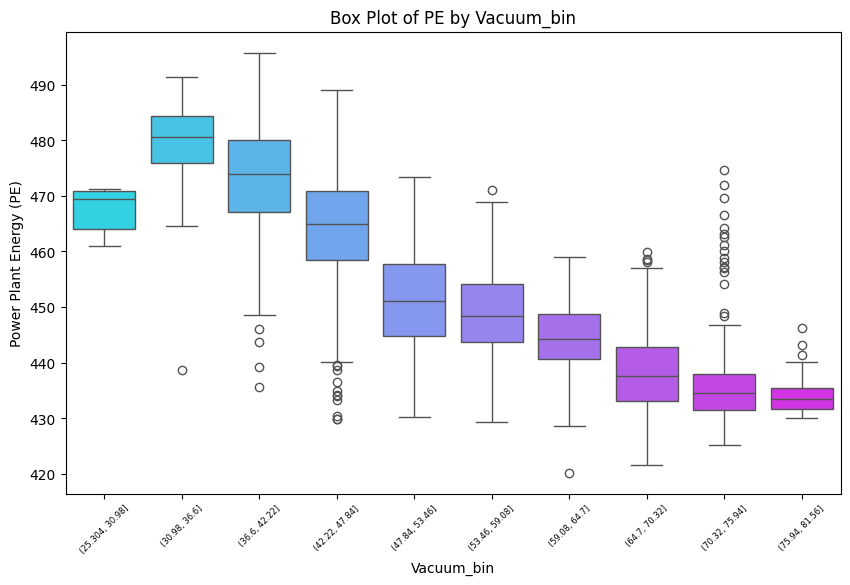

In [26]:
# Create box plots for each binned feature against PE
for feature in binned_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y='Electrical_Power_Output', data=binned_df, palette='cool', hue=feature,legend=False)
    plt.title(f'Box Plot of PE by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Power Plant Energy (PE)')
    plt.xticks(rotation=45, size=6)
    plt.show()

#### Plot after removing outliers

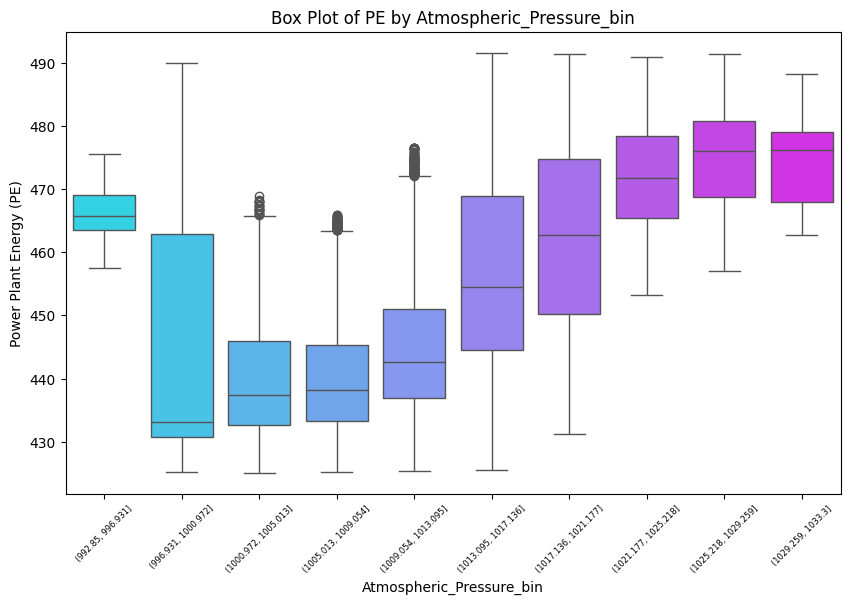

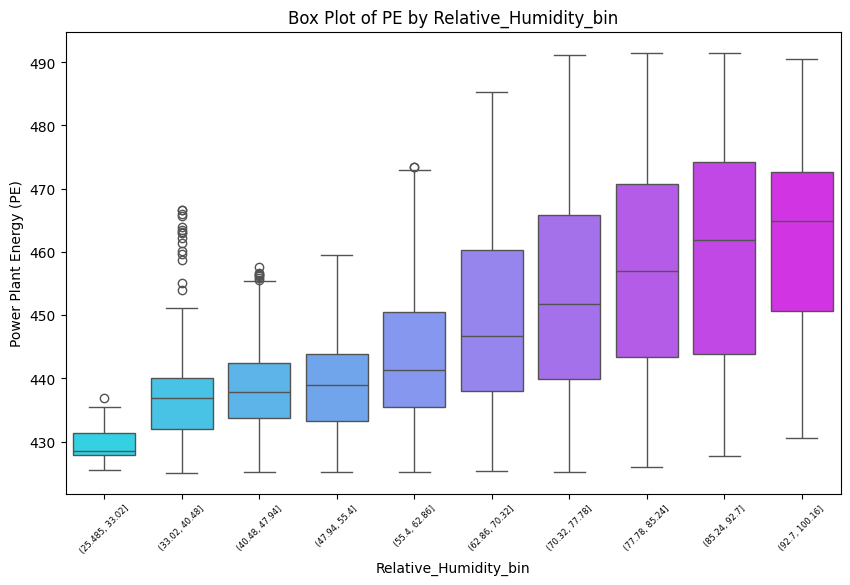

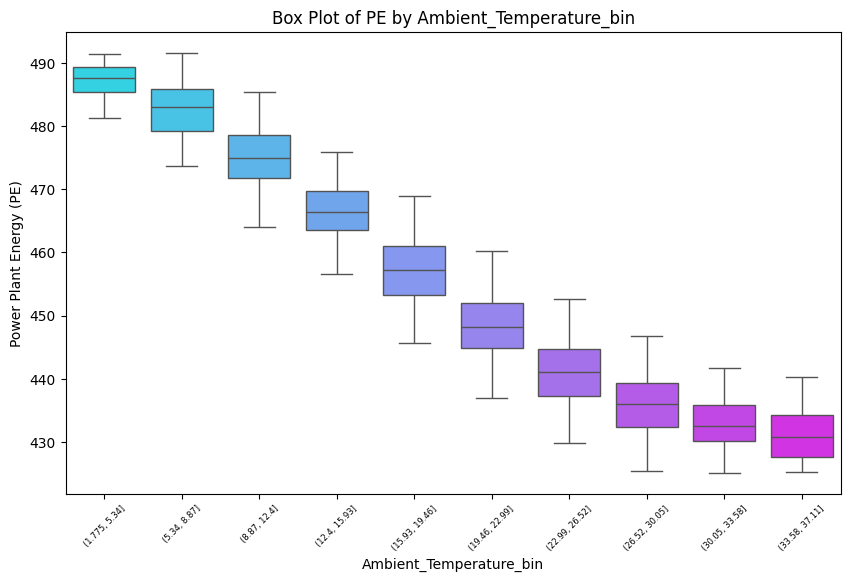

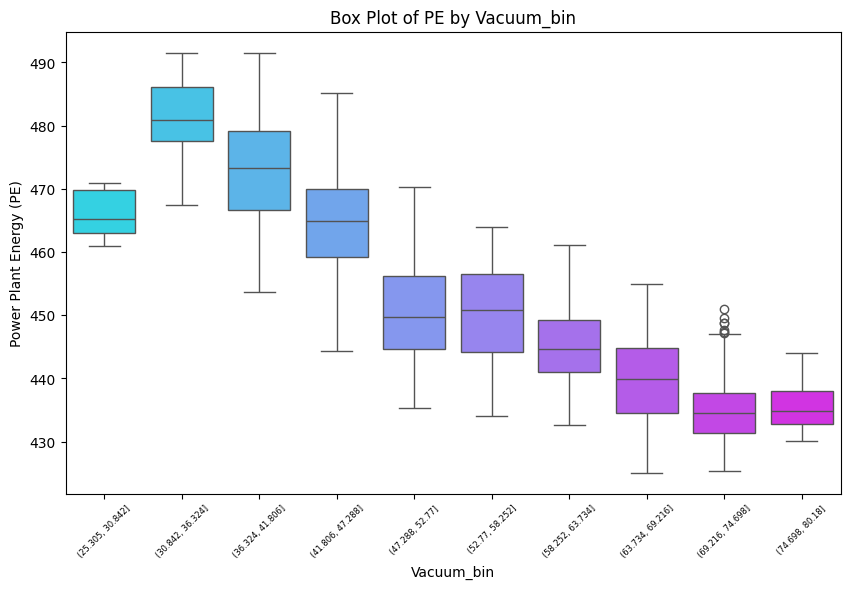

In [27]:
# Create a new DataFrame with categorical bins for each feature
# This example will categorize continuous features into bins.
df_outliers_removed['Atmospheric_Pressure_bin'] = pd.cut(df_outliers_removed['Atmospheric_Pressure'], bins=10)
df_outliers_removed['Relative_Humidity_bin'] = pd.cut(df_outliers_removed['Relative_Humidity'], bins=10)
df_outliers_removed['Ambient_Temperature_bin'] = pd.cut(df_outliers_removed['Ambient_Temperature'], bins=10)
df_outliers_removed['Vacuum_bin'] = pd.cut(df_outliers_removed['Vacuum'], bins=10)

# List of binned features
binned_features = ['Atmospheric_Pressure_bin', 'Relative_Humidity_bin', 'Ambient_Temperature_bin', 'Vacuum_bin']

# Create box plots for each binned feature against PE
for feature in binned_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y='Electrical_Power_Output', data=df_outliers_removed, palette='cool', hue=feature,legend=False)
    plt.title(f'Box Plot of PE by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Power Plant Energy (PE)')
    plt.xticks(rotation=45, size=6)
    plt.show()

# outlier removed check

# Best variable combination check (df_outliers_removed)

In [28]:
df_outliers_removed.head()

,Ambient_Temperature,Vacuum,Atmospheric_Pressure,Relative_Humidity,Electrical_Power_Output,Ambient_Temperature*Atmospheric_Pressure,Ambient_Temperature*Vacuum,Ambient_Temperature_bin,Relative_Humidity_bin,Atmospheric_Pressure_bin,Vacuum_bin
1,23.64,58.49,1011.40,74.20,445.75,23909.4960,1382.7036,"(22.99, 26.52]","(70.32, 77.78]","(1009.054, 1013.095]","(58.252, 63.734]"
2,29.74,56.90,1007.15,41.91,438.76,29952.6410,1692.2060,"(26.52, 30.05]","(40.48, 47.94]","(1005.013, 1009.054]","(52.77, 58.252]"
3,19.07,49.69,1007.22,76.79,453.09,19207.6854,947.5883,"(15.93, 19.46]","(70.32, 77.78]","(1005.013, 1009.054]","(47.288, 52.77]"
4,11.80,40.66,1017.13,97.20,464.43,12002.1340,479.7880,"(8.87, 12.4]","(92.7, 100.16]","(1013.095, 1017.136]","(36.324, 41.806]"
5,13.97,39.16,1016.05,84.60,470.96,14194.2185,547.0652,"(12.4, 15.93]","(77.78, 85.24]","(1013.095, 1017.136]","(36.324, 41.806]"


In [32]:
from itertools import combinations

X = df_outliers_removed[['Ambient_Temperature',	'Vacuum','Atmospheric_Pressure','Relative_Humidity']]  # Excluding target and binned columns
y = df_outliers_removed['Electrical_Power_Output']  # Define target variable
cols = X.columns

for i in range(1, len(cols) + 1):
    for comb in combinations(cols, i):
        X_comb = df_outliers_removed[list(comb)].dropna()  # Drop rows with missing values in features
        y_comb = y.loc[X_comb.index]  # Align target variable with the filtered features
        if len(X_comb) == len(y_comb):  # Ensure the number of samples match
            model = Model(X_comb, y_comb)
            mse, mae, r2 = model.train()
            print('----------------------------------------------')
            print(f'Train Metrics: Features: {comb}, MSE: {mse}, MAE: {mae}, R2: {r2}')
            mse, mae, r2 = model.validate()
            print(f'Validation Metrics Features: {comb}, MSE: {mse}, MAE: {mae}, R2: {r2}')
            print('----------------------------------------------')
        else:
            print(f"Skipping combination {comb} due to mismatch in sample size.")

----------------------------------------------
Train Metrics: Features: ('Ambient_Temperature',), MSE: 23.83, MAE: 3.98, R2: 0.91
Validation Metrics Features: ('Ambient_Temperature',), MSE: 23.31, MAE: 3.95, R2: 0.91
----------------------------------------------
----------------------------------------------
Train Metrics: Features: ('Vacuum',), MSE: 57.81, MAE: 6.03, R2: 0.78
Validation Metrics Features: ('Vacuum',), MSE: 60.1, MAE: 6.09, R2: 0.78
----------------------------------------------
----------------------------------------------
Train Metrics: Features: ('Atmospheric_Pressure',), MSE: 169.77, MAE: 10.64, R2: 0.36
Validation Metrics Features: ('Atmospheric_Pressure',), MSE: 163.81, MAE: 10.41, R2: 0.4
----------------------------------------------
----------------------------------------------
Train Metrics: Features: ('Relative_Humidity',), MSE: 211.36, MAE: 12.07, R2: 0.2
Validation Metrics Features: ('Relative_Humidity',), MSE: 220.79, MAE: 12.36, R2: 0.19
--------------

In [34]:
# for all combinations of columns
from itertools import combinations
X = df_outliers_removed[['Ambient_Temperature',	'Vacuum','Atmospheric_Pressure','Relative_Humidity']] # exclude the target
cols = X.columns
# Store the results in  matrix
best_combinations=[]
for trial in range(100):
    results = {}
    for i in range(2, len(cols)+1):
        for comb in combinations(cols, i):
            X = df_outliers_removed[list(comb)]
            model = Model(X, y,random_state=np.random.randint(0,100))
            model.train()
            mse, mae, r2=model.validate()
            # print(f'Columns: {comb}, MSE: {mse}, MAE: {mae}, R2: {r2}')
            results[comb] = (mse, mae, r2)
    # Find the best combination
    best_comb = min(results, key=results.get)
    # print(f'Best combination: {best_comb}, MSE: {results[best_comb][0]}, MAE: {results[best_comb][1]}, R2: {results[best_comb][2]}')
    best_combinations.append(best_comb)

Text(0.5, 1.0, 'Most common combination of Featues')

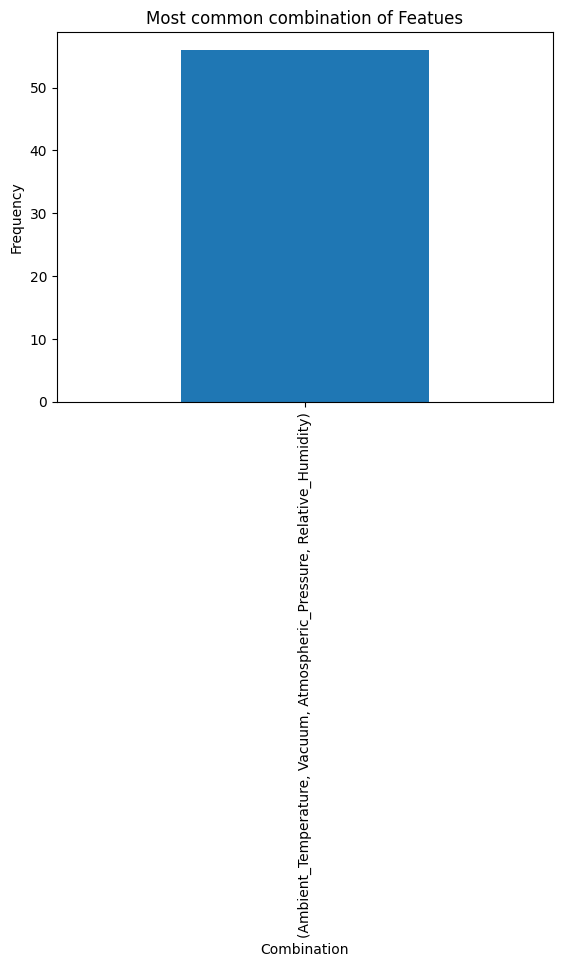

In [35]:
# Plot best variable combination
pd.DataFrame(best_combinations).value_counts().plot(kind='bar')
plt.xlabel('Combination')
plt.ylabel('Frequency')
plt.title('Most common combination of Featues')

In [36]:
# Best combination base line
X = df_outliers_removed[['Ambient_Temperature', 'Vacuum', 'Atmospheric_Pressure', 'Relative_Humidity']]
model = Model(X, y)
model.train()
model.validate()
mse, mae, r2=model.test()
print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')

MSE: 16.18, MAE: 3.31, R2: 0.94


In [37]:
## Test the model with OLS
X = df_outliers_removed[['Ambient_Temperature', 'Vacuum', 'Atmospheric_Pressure', 'Relative_Humidity']]
y = df_outliers_removed['Electrical_Power_Output']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Electrical_Power_Output   R-squared:                       0.938
Model:                                 OLS   Adj. R-squared:                  0.937
Method:                      Least Squares   F-statistic:                 3.116e+04
Date:                     Thu, 17 Oct 2024   Prob (F-statistic):               0.00
Time:                             01:56:49   Log-Likelihood:                -23472.
No. Observations:                     8312   AIC:                         4.695e+04
Df Residuals:                         8307   BIC:                         4.699e+04
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  412.2340     10.153     40.602      0.000     392.332     432.136
Ambient_Temperature     -1.9009      0.017   -111.308      0.000      -1.934      -1.867
Vacuum                  -0.2397      0.008    -31.926      0.000      -0.254      -0.225
Atmospheric_Pressure     0.1009      0.010     10.272      0.000       0.082       0.120
Relative_Humidity       -0.1358      0.004    -31.759      0.000      -0.144      -0.127
==============================================================================
Omnibus:                      130.044   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.000
Skew:                           0.179   Prob(JB):                     3.18e-22
Kurtosis:                       2.602   Cond. No.                     2.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
### Fit the model with 
model = Model(X, y, model="OLS")
model.train()
mse, mae, r2=model.validate()
print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')

MSE: 16.79, MAE: 3.37, R2: 0.94


In [40]:
X = df_outliers_removed[['Ambient_Temperature', 'Atmospheric_Pressure', 'Relative_Humidity']]
y = df_outliers_removed['Electrical_Power_Output']
model = Model(X, y, model="LinearRegression", random_state=42)
model.train()
mse, mae, r2=model.test()
print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')

MSE: 18.11, MAE: 3.52, R2: 0.93


In [44]:
X=df_outliers_removed[['Ambient_Temperature', 'Atmospheric_Pressure', 'Relative_Humidity']]
model = Model(X, y, model="LinearRegression", random_state=42)
model.train()
mse, mae, r2=model.validate()
print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')

MSE: 18.67, MAE: 3.55, R2: 0.93


# Multiple Model comparison:

In [76]:
model.get_models()

['LinearRegression',
 'OLS',
 'DecisionTreeRegressor',
 'RandomForestRegressor',
 'GradientBoostingRegressor',
 'AdaBoostRegressor',
 'BaggingRegressor',
 'SVR',
 'MLPRegressor']

In [45]:
for model_name in Model.get_models(): #get all models
    model = Model(X, y, model=model_name) # get the modelname and assign it to the model
    train_results=model.train() # train on the model
    validation_results=model.validate() #get results
    test_results=model.test() # test results
    #print(f'| {model_name} | {train_results[0]}| {train_results[1]}|{train_results[2]}| {validation_results[0]}|{validation_results[1]}|{validation_results[2]} | {test_results[0]}| {test_results[1]}|{test_results[0]}|')
    print(f'<tr><td>{model_name}</td><td>{train_results[0]}</td><td>{train_results[1]}</td><td>{train_results[2]}</td><td>{validation_results[0]}</td><td>{validation_results[1]}</td><td>{validation_results[2]}</td><td>{test_results[0]}</td><td>{test_results[1]}</td><td>{test_results[2]}</td></tr>')

<tr><td>LinearRegression</td><td>18.83</td><td>3.55</td><td>0.93</td><td>18.67</td><td>3.55</td><td>0.93</td><td>18.11</td><td>3.52</td><td>0.93</td></tr>
<tr><td>OLS</td><td>23.38</td><td>3.96</td><td>0.91</td><td>22.98</td><td>3.91</td><td>0.92</td><td>22.82</td><td>3.89</td><td>0.91</td></tr>
<tr><td>DecisionTreeRegressor</td><td>0.0</td><td>0.0</td><td>1.0</td><td>25.96</td><td>3.87</td><td>0.9</td><td>27.5</td><td>4.07</td><td>0.9</td></tr>
<tr><td>RandomForestRegressor</td><td>2.09</td><td>1.13</td><td>0.99</td><td>14.69</td><td>3.03</td><td>0.95</td><td>14.73</td><td>3.05</td><td>0.94</td></tr>
<tr><td>GradientBoostingRegressor</td><td>13.38</td><td>2.96</td><td>0.95</td><td>15.17</td><td>3.18</td><td>0.94</td><td>14.73</td><td>3.13</td><td>0.94</td></tr>
<tr><td>AdaBoostRegressor</td><td>17.43</td><td>3.45</td><td>0.93</td><td>18.02</td><td>3.49</td><td>0.93</td><td>18.28</td><td>3.53</td><td>0.93</td></tr>
<tr><td>BaggingRegressor</td><td>2.85</td><td>1.23</td><td>0.99</td><td

<tr><td>LinearRegression</td><td>18.83</td><td>3.55</td><td>0.93</td><td>18.67</td><td>3.55</td><td>0.93</td><td>18.11</td><td>3.52</td><td>0.93</td></tr>
<tr><td>OLS</td><td>23.38</td><td>3.96</td><td>0.91</td><td>22.98</td><td>3.91</td><td>0.92</td><td>22.82</td><td>3.89</td><td>0.91</td></tr>
<tr><td>DecisionTreeRegressor</td><td>0.0</td><td>0.0</td><td>1.0</td><td>25.96</td><td>3.87</td><td>0.9</td><td>27.5</td><td>4.07</td><td>0.9</td></tr>
<tr><td>RandomForestRegressor</td><td>2.09</td><td>1.13</td><td>0.99</td><td>14.69</td><td>3.03</td><td>0.95</td><td>14.73</td><td>3.05</td><td>0.94</td></tr>
<tr><td>GradientBoostingRegressor</td><td>13.38</td><td>2.96</td><td>0.95</td><td>15.17</td><td>3.18</td><td>0.94</td><td>14.73</td><td>3.13</td><td>0.94</td></tr>
<tr><td>AdaBoostRegressor</td><td>17.43</td><td>3.45</td><td>0.93</td><td>18.02</td><td>3.49</td><td>0.93</td><td>18.28</td><td>3.53</td><td>0.93</td></tr>
<tr><td>BaggingRegressor</td><td>2.85</td><td>1.23</td><td>0.99</td><td>15.96</td><td>3.13</td><td>0.94</td><td>16.05</td><td>3.17</td><td>0.94</td></tr>
<tr><td>SVR</td><td>236.66</td><td>12.68</td><td>0.1</td><td>241.67</td><td>12.82</td><td>0.11</td><td>234.17</td><td>12.74</td><td>0.12</td></tr>
<tr><td>MLPRegressor</td><td>23.39</td><td>3.95</td><td>0.91</td><td>22.93</td><td>3.9</td><td>0.92</td><td>22.76</td><td>3.89</td><td>0.91</td></tr>

| Model                   | Train MSE | Train MAE | Train R² | Val MSE | Val MAE | Val R² | Test MSE | Test MAE | Test R² |
| ----------------------- | --------- | --------- | -------- | ------- | ------- | ------- | -------- | -------- | ------- |
| LinearRegression         | 18.83     | 3.55      | 0.93     | 18.67   | 3.55    | 0.93    | 18.11    | 3.52     | 0.93    |
| OLS                      | 23.38     | 3.96      | 0.91     | 22.98   | 3.91    | 0.92    | 22.82    | 3.89     | 0.91    |
| DecisionTreeRegressor     | 0.0       | 0.0       | 1.0      | 25.96   | 3.87    | 0.9     | 27.5     | 4.07     | 0.9     |
| RandomForestRegressor     | 2.09      | 1.13      | 0.99     | 14.69   | 3.03    | 0.95    | 14.73    | 3.05     | 0.94    |
| GradientBoostingRegressor | 13.38     | 2.96      | 0.95     | 15.17   | 3.18    | 0.94    | 14.73    | 3.13     | 0.94    |
| AdaBoostRegressor         | 17.43     | 3.45      | 0.93     | 18.02   | 3.49    | 0.93    | 18.28    | 3.53     | 0.93    |
| BaggingRegressor          | 2.85      | 1.23      | 0.99     | 15.96   | 3.13    | 0.94    | 16.05    | 3.17     | 0.94    |
| SVR                      | 236.66    | 12.68     | 0.1      | 241.67  | 12.82   | 0.11    | 234.17   | 12.74    | 0.12    |
| MLPRegressor              | 23.39     | 3.95      | 0.91     | 22.93   | 3.9     | 0.92    | 22.76    | 3.89     | 0.91    |


# Bagging Regressor

## raw data

In [26]:
X = df[['Ambient_Temperature', 'Atmospheric_Pressure', 'Relative_Humidity']]
y = df['Electrical_Power_Output']

model = Model(X, y, model="BaggingRegressor", random_state=42)
model.train()
test_results=model.test()
mse, mae, r2=model.validate()
validation_results=model.validate()
print(f' MSE: {mse}, MAE: {mae}, R2: {r2}')
print(f'Validation results: {validation_results}')
print(f'test results: {test_results}')

 MSE: 20.98, MAE: 3.46, R2: 0.93
Validation results: [20.98  3.46  0.93]
test results: [20.27  3.43  0.93]


## outliers removed (scale 1.0)

In [27]:
X = df_outliers_removed[['Ambient_Temperature', 'Atmospheric_Pressure', 'Relative_Humidity']]
y = df_outliers_removed['Electrical_Power_Output']

model = Model(X, y, model="BaggingRegressor", random_state=42)
model.train()
test_results=model.test()
mse, mae, r2=model.validate()
validation_results=model.validate()
print(f' MSE: {mse}, MAE: {mae}, R2: {r2}')
print(f'Validation results: {validation_results}')
print(f'test results: {test_results}')

 MSE: 13.99, MAE: 2.95, R2: 0.95
Validation results: [13.99  2.95  0.95]
test results: [13.85  2.92  0.95]


## outliers removed (scale 1.5)

In [28]:
X = df_outliers_removed_higher[['Ambient_Temperature', 'Atmospheric_Pressure', 'Relative_Humidity']]
y = df_outliers_removed_higher['Electrical_Power_Output']

model = Model(X, y, model="BaggingRegressor", random_state=42)
model.train()
test_results=model.test()
mse, mae, r2=model.validate()
validation_results=model.validate()
print(f' MSE: {mse}, MAE: {mae}, R2: {r2}')
print(f'Validation results: {validation_results}')
print(f'test results: {test_results}')

 MSE: 20.59, MAE: 3.43, R2: 0.93
Validation results: [20.59  3.43  0.93]
test results: [19.83  3.38  0.93]


## outliers removed (scale 0.5)

In [29]:
X = df_outliers_removed_lower[['Ambient_Temperature', 'Atmospheric_Pressure', 'Relative_Humidity']]
y = df_outliers_removed_lower['Electrical_Power_Output']

model = Model(X, y, model="BaggingRegressor", random_state=42)
model.train()
test_results=model.test()
mse, mae, r2=model.validate()
validation_results=model.validate()
print(f' MSE: {mse}, MAE: {mae}, R2: {r2}')
print(f'Validation results: {validation_results}')
print(f'test results: {test_results}')

 MSE: 20.6, MAE: 3.45, R2: 0.93
Validation results: [20.6   3.45  0.93]
test results: [19.6   3.36  0.93]


# RandomForestRegressor

## raw data

In [30]:
X = df[['Ambient_Temperature', 'Atmospheric_Pressure', 'Relative_Humidity']]
y = df['Electrical_Power_Output']

model = Model(X, y, model="RandomForestRegressor", random_state=42)
model.train()
test_results=model.test()
mse, mae, r2=model.validate()
validation_results=model.validate()
print(f' MSE: {mse}, MAE: {mae}, R2: {r2}')
print(f'Validation results: {validation_results}')
print(f'test results: {test_results}')

 MSE: 19.22, MAE: 3.33, R2: 0.94
Validation results: [19.22  3.33  0.94]
test results: [18.51  3.28  0.94]


## outliers removed (scale 1.0)

In [31]:
X = df_outliers_removed[['Ambient_Temperature', 'Atmospheric_Pressure', 'Relative_Humidity']]
y = df_outliers_removed['Electrical_Power_Output']

model = Model(X, y, model="RandomForestRegressor", random_state=42)
model.train()
test_results=model.test()
mse, mae, r2=model.validate()
validation_results=model.validate()
print(f' MSE: {mse}, MAE: {mae}, R2: {r2}')
print(f'Validation results: {validation_results}')
print(f'test results: {test_results}')

 MSE: 12.66, MAE: 2.81, R2: 0.96
Validation results: [12.66  2.81  0.96]
test results: [12.99  2.87  0.95]


## outliers removed (scale 1.5)

In [32]:
X = df_outliers_removed_higher[['Ambient_Temperature', 'Atmospheric_Pressure', 'Relative_Humidity']]
y = df_outliers_removed_higher['Electrical_Power_Output']

model = Model(X, y, model="RandomForestRegressor", random_state=42)
model.train()
test_results=model.test()
mse, mae, r2=model.validate()
validation_results=model.validate()
print(f' MSE: {mse}, MAE: {mae}, R2: {r2}')
print(f'Validation results: {validation_results}')
print(f'test results: {test_results}')

 MSE: 19.03, MAE: 3.3, R2: 0.94
Validation results: [19.03  3.3   0.94]
test results: [18.36  3.25  0.94]


## outliers removed (scale 0.5)

In [33]:
X = df_outliers_removed_lower[['Ambient_Temperature', 'Atmospheric_Pressure', 'Relative_Humidity']]
y = df_outliers_removed_lower['Electrical_Power_Output']

model = Model(X, y, model="RandomForestRegressor", random_state=42)
model.train()
test_results=model.test()
mse, mae, r2=model.validate()
validation_results=model.validate()
print(f' MSE: {mse}, MAE: {mae}, R2: {r2}')
print(f'Validation results: {validation_results}')
print(f'test results: {test_results}')

 MSE: 19.18, MAE: 3.32, R2: 0.94
Validation results: [19.18  3.32  0.94]
test results: [18.54  3.27  0.94]


# Random Forest (with Vacuum)

In [14]:
#raw data
X = df[['Ambient_Temperature', 'Atmospheric_Pressure', 'Relative_Humidity','Vacuum']]
y = df['Electrical_Power_Output']

model = Model(X, y, model="RandomForestRegressor", random_state=42)
model.train()
test_results=model.test()
mse, mae, r2=model.validate()
validation_results=model.validate()
print(f' MSE: {mse}, MAE: {mae}, R2: {r2}')
print(f'Validation results: {validation_results}')
print(f'test results: {test_results}')

 MSE: 12.15, MAE: 2.52, R2: 0.96
Validation results: [12.15  2.52  0.96]
test results: [10.7   2.36  0.96]


In [15]:
#removed outliers
X = df_outliers_removed[['Ambient_Temperature', 'Atmospheric_Pressure', 'Relative_Humidity','Vacuum']]
y = df_outliers_removed['Electrical_Power_Output']

model = Model(X, y, model="RandomForestRegressor", random_state=42)
model.train()
test_results=model.test()
mse, mae, r2=model.validate()
validation_results=model.validate()
print(f' MSE: {mse}, MAE: {mae}, R2: {r2}')
print(f'Validation results: {validation_results}')
print(f'test results: {test_results}')

 MSE: 9.38, MAE: 2.36, R2: 0.97
Validation results: [9.38 2.36 0.97]
test results: [8.29 2.2  0.97]


# Prediction plot (outliers removed) with validation size and optimal scale parameters:

In [ ]:
predictions = model.predict(x_test) #use the holdout set to run our predictions through

In [ ]:
# with vaccuum 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np



# Features (X) and target (y) - Outliers already removed
X = df_outliers_removed[['Ambient_Temperature', 'Atmospheric_Pressure', 'Relative_Humidity','Vacuum']]
y = df_outliers_removed['Electrical_Power_Output']


# First split: training + test sets
# Test size of 20
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: split training into training + validation sets
# from 80% training data split into 64% training data and 16% validation data.
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Initialize and fit the RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_predictions = model.predict(X_val)

# Calculate performance metrics on the validation set
mse_val = mean_squared_error(y_val, y_val_predictions)
mae_val = mean_absolute_error(y_val, y_val_predictions)
r2_val = r2_score(y_val, y_val_predictions)

# For plot: Make predictions on the test set
y_test_predictions = model.predict(X_test)

# Limit observations to plot (test set for plot)
start_obs = 100
end_obs = 150

# Selecting part of the data for plotting
predictions_num = y_test_predictions[start_obs:end_obs]
y_test_num = y_test.iloc[start_obs:end_obs]
x_values_num = np.arange(len(predictions_num))

# Plotting
plt.figure(figsize=(10, 6))

# Plot actual vs predicted values (test set)
plt.plot(x_values_num, y_test_num, linewidth=3, marker='.', label='Actual Values', color='blue')
plt.plot(x_values_num, predictions_num, linewidth=1.5, label='Predicted Values', color='orange')

# Add title with MSE, MAE, R² for validation set
plt.title(f'RandomForest Predictions vs Actual (outliers removed)\n'
          f'MSE: {mse_val:.4f}, MAE: {mae_val:.4f}, R²: {r2_val:.4f} (Validation)')

# Labels and legend
plt.xlabel('Observation Index')
plt.ylabel('Energy Values')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
#without vacuum
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Features (X) and target (y) - Outliers already removed
X = df_outliers_removed[['Ambient_Temperature', 'Atmospheric_Pressure', 'Relative_Humidity']]
y = df_outliers_removed['Electrical_Power_Output']

# First split: training + test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: split training into training + validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Initialize and fit the RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_predictions = model.predict(X_val)

# Calculate performance metrics on the validation set
mse_val = mean_squared_error(y_val, y_val_predictions)
mae_val = mean_absolute_error(y_val, y_val_predictions)
r2_val = r2_score(y_val, y_val_predictions)

# For plot: Make predictions on the test set
y_test_predictions = model.predict(X_test)

# Limit observations to plot (test set for plot)
start_obs = 100
end_obs = 150

# Selecting part of the data for plotting
predictions_num = y_test_predictions[start_obs:end_obs]
y_test_num = y_test.iloc[start_obs:end_obs]
x_values_num = np.arange(len(predictions_num))

# Plotting
plt.figure(figsize=(10, 6))

# Plot actual vs predicted values (test set)
plt.plot(x_values_num, y_test_num, linewidth=3, marker='.', label='Actual Values', color='blue')
plt.plot(x_values_num, predictions_num, linewidth=1.5, label='Predicted Values', color='orange')

# Add title with MSE, MAE, R² for validation set
plt.title(f'RandomForest Predictions vs Actual (outliers removed)\n'
          f'MSE: {mse_val:.4f}, MAE: {mae_val:.4f}, R²: {r2_val:.4f} (Validation)')

# Labels and legend
plt.xlabel('Observation Index')
plt.ylabel('Energy Values')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


# BaggingRegressor: Predicted vs Actual: Line Plot 
# (original df)

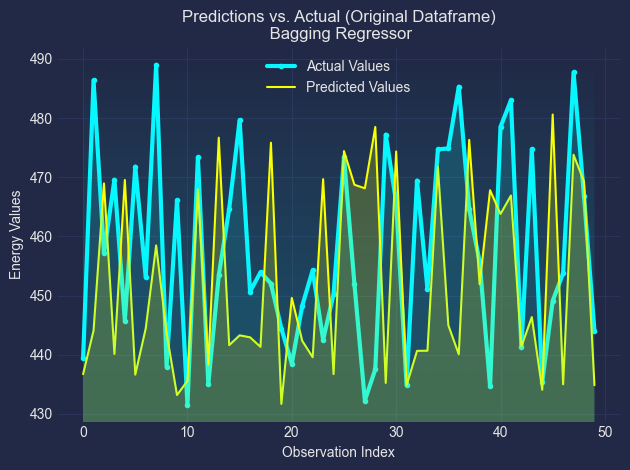

In [170]:
x = df[['Ambient_Temperature', 'Atmospheric_Pressure', 'Relative_Humidity']]
y = df['Electrical_Power_Output']
model=BaggingRegressor() # here we define the model as an empty function
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42) # same test size as base model class
model.fit(x_train, y_train) # fit the model to the train set of x and y

# Limit observations to plot
start_obs = 100
end_obs = 150
predictions = model.predict(x_test) #use the holdout set to run our predictions through
predictions_num = predictions[start_obs:end_obs]
y_test_num = y_test[start_obs:end_obs]
x_values_num = np.arange(len(predictions_num))  # Adjust x_values to match
y_values_num = np.arange(len(y_test_num))

# Line plots for actual and predicted values (based on desired observations)
plt.plot(y_values_num, y_test_num, linewidth=3, marker='.', label='Actual Values')
mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.2, gradient_start='top')  # underglow specs

plt.plot(x_values_num, predictions_num, linewidth=1.5, alpha=1, label='Predicted Values',color='#f7ff00')
mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.2, gradient_start='zero')  # underglow specs

# Add title and labels
plt.title('Predictions vs. Actual (Original Dataframe)\n Bagging Regressor')
plt.xlabel('Observation Index')
plt.ylabel('Energy Values')
plt.legend()
plt.tight_layout()
plt.show()

# Bagging Regressor: Predicted vs Actual: Line Plot 
# (outliers removed)

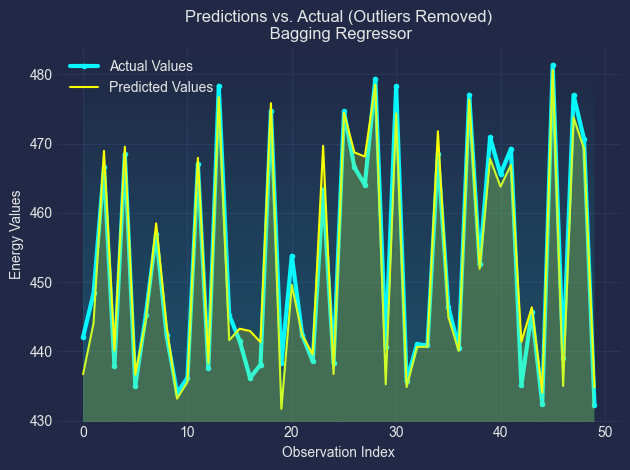

In [164]:
x = df_outliers_removed[['Ambient_Temperature', 'Atmospheric_Pressure', 'Relative_Humidity']]
y = df_outliers_removed['Electrical_Power_Output']
model=BaggingRegressor() # here we define the model as an empty function
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42) # same test size as base model class
model.fit(x_train, y_train) # fit the model to the train set of x and y

# Limit observations to plot
start_obs = 100
end_obs = 150
predictions = model.predict(x_test) #use the holdout set to run our predictions through
predictions_num = predictions[start_obs:end_obs]
y_test_num = y_test[start_obs:end_obs]
x_values_num = np.arange(len(predictions_num))  # Adjust x_values to match
y_values_num = np.arange(len(y_test_num))

# Line plots for actual and predicted values (based on desired observations)
plt.plot(y_values_num, y_test_num, linewidth=3, marker='.', label='Actual Values')
mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.2, gradient_start='top')  # underglow specs

plt.plot(x_values_num, predictions_num, linewidth=1.5, alpha=1, label='Predicted Values',color='#f7ff00')
mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.2, gradient_start='zero')  # underglow specs

# Add title and labels
plt.title('Predictions vs. Actual (Outliers Removed)\n Bagging Regressor')
plt.xlabel('Observation Index')
plt.ylabel('Energy Values')
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
x = df_outliers_removed[['Ambient_Temperature', 'Atmospheric_Pressure', 'Relative_Humidity','Vacuum']]
y = df_outliers_removed['Electrical_Power_Output']
model=BaggingRegressor() # here we define the model as an empty function
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42) # same test size as base model class
model.fit(x_train, y_train) # fit the model to the train set of x and y

# Limit observations to plot
start_obs = 100
end_obs = 150
predictions = model.predict(x_test) #use the holdout set to run our predictions through
predictions_num = predictions[start_obs:end_obs]
y_test_num = y_test[start_obs:end_obs]
x_values_num = np.arange(len(predictions_num))  # Adjust x_values to match
y_values_num = np.arange(len(y_test_num))

# Line plots for actual and predicted values (based on desired observations)
plt.plot(y_values_num, y_test_num, linewidth=3, marker='.', label='Actual Values')
mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.2, gradient_start='top')  # underglow specs

plt.plot(x_values_num, predictions_num, linewidth=1.5, alpha=1, label='Predicted Values',color='#f7ff00')
mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.2, gradient_start='zero')  # underglow specs

# Add title and labels
plt.title('Predictions vs. Actual (Outliers Removed)\n Bagging Regressor')
plt.xlabel('Observation Index')
plt.ylabel('Energy Values')
plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'predictions' is not defined

# RandomForest: Predicted vs Actual: Line Plot
# (original df)

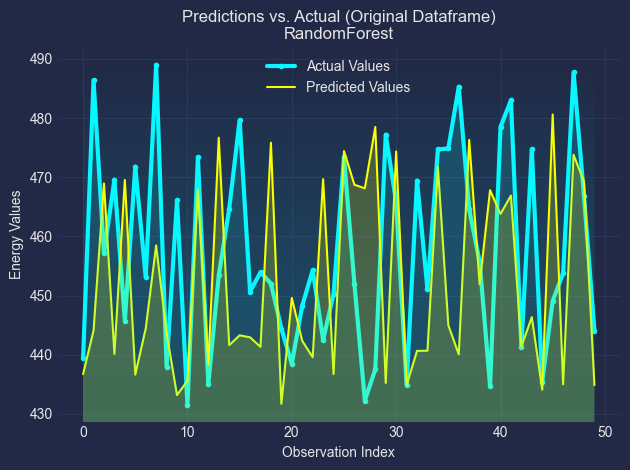

In [168]:
x = df[['Ambient_Temperature', 'Atmospheric_Pressure', 'Relative_Humidity']]
y = df['Electrical_Power_Output']
model=RandomForestRegressor() # here we define the model as an empty function
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42) # same test size as base model class
model.fit(x_train, y_train) # fit the model to the train set of x and y

# Limit observations to plot
start_obs = 100
end_obs = 150

predictions_num = predictions[start_obs:end_obs]
y_test_num = y_test[start_obs:end_obs]
x_values_num = np.arange(len(predictions_num))  # Adjust x_values to match
y_values_num = np.arange(len(y_test_num))

# Line plots for actual and predicted values (based on desired observations)
plt.plot(y_values_num, y_test_num, linewidth=3, marker='.', label='Actual Values')
mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.2, gradient_start='top')  # underglow specs

plt.plot(x_values_num, predictions_num, linewidth=1.5, alpha=1, label='Predicted Values',color='#f7ff00')
mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.2, gradient_start='zero')  # underglow specs

# Add title and labels
plt.title('Predictions vs. Actual (Original Dataframe)\nRandomForest')
plt.xlabel('Observation Index')
plt.ylabel('Energy Values')
plt.legend()
plt.tight_layout()
plt.show()

# RandomForest: Predicted vs Actual: Line Plot
# (outliers removed)

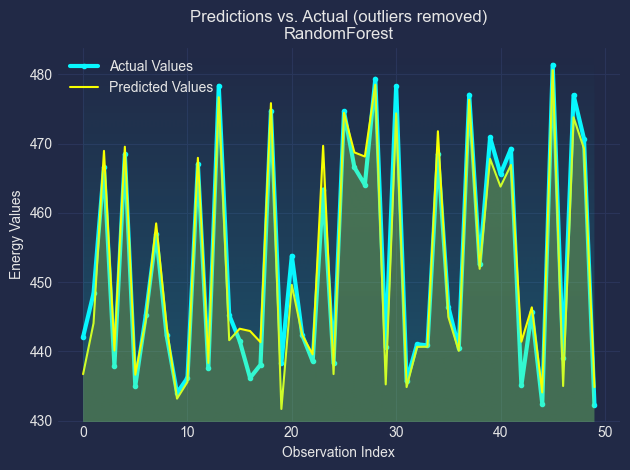

In [171]:
x = df_outliers_removed[['Ambient_Temperature', 'Atmospheric_Pressure', 'Relative_Humidity']]
y = df_outliers_removed['Electrical_Power_Output']
model=RandomForestRegressor() # here we define the model as an empty function
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42) # same test size as base model class
model.fit(x_train, y_train) # fit the model to the train set of x and y

# Limit observations to plot
start_obs = 100
end_obs = 150

predictions_num = predictions[start_obs:end_obs]
y_test_num = y_test[start_obs:end_obs]
x_values_num = np.arange(len(predictions_num))  # Adjust x_values to match
y_values_num = np.arange(len(y_test_num))

# Line plots for actual and predicted values (based on desired observations)
plt.plot(y_values_num, y_test_num, linewidth=3, marker='.', label='Actual Values')
mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.2, gradient_start='top')  # underglow specs

plt.plot(x_values_num, predictions_num, linewidth=1.5, alpha=1, label='Predicted Values',color='#f7ff00')
mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.2, gradient_start='zero')  # underglow specs

# Add title and labels
plt.title('Predictions vs. Actual (outliers removed)\nRandomForest')
plt.xlabel('Observation Index')
plt.ylabel('Energy Values')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
####start of function definition

# Function to remove outliers from target var, based on feature
def remove_outliers(df, feature, target):
    # Define Q1,Q3,IQR
    Q1 = df.groupby(feature, observed=False)[target].quantile(0.25)
    Q3 = df.groupby(feature, observed=False)[target].quantile(0.75)
    IQR = Q3 - Q1
    # Define lower and upper limit for removal, adjust scale factor integer as needed
    # Using a scale factor (like IQR) allows for adjustment based on the dataset's characteristics,
    # making the outlier detection process more flexible and context-sensitive
    lower_bound = Q1 - 1.0 * IQR
    upper_bound = Q3 + 1.0 * IQR
    # Merge bounds to original dataframe
    bounds_df = pd.DataFrame({'lower_bound': lower_bound, 'upper_bound': upper_bound})
    df = df.merge(bounds_df, how='left', left_on=feature, right_index=True)
    # Outlier index tracking
    outlier_indices = df[(df[target] < df['lower_bound']) | (df[target] > df['upper_bound'])].index
    # Make dataframe without outliers, keep less than upper and above lower bounds
    df_filtered = df[(df[target] >= df['lower_bound']) & (df[target] <= df['upper_bound'])]
    # Drop the columns with bounds
    df_filtered = df_filtered.drop(['lower_bound', 'upper_bound'], axis=1)

    return df_filtered, outlier_indices
####end of function definition
######### start of Bin and remove outliers

# Create a copy of the original df to avoid altering it
binned_df = df.copy()

# Feature bin creation in the new dataframe
binned_df['Ambient_Temperature_bin'] = pd.cut(binned_df['Ambient_Temperature'], bins=10)
binned_df['Relative_Humidity_bin'] = pd.cut(binned_df['Relative_Humidity'], bins=10)
binned_df['Atmospheric_Pressure_bin'] = pd.cut(binned_df['Atmospheric_Pressure'], bins=10)
binned_df['Vacuum_bin'] = pd.cut(binned_df['Vacuum'], bins=10)

# List of binned features
binned_features = ['Atmospheric_Pressure_bin', 'Relative_Humidity_bin', 'Ambient_Temperature_bin', 'Vacuum_bin']

df_outliers_removed = binned_df.copy() # copy binned df to remove outliers from
removed_indices = [] # Set an empty list for removed_indices before adding to list

# Apply outlier_removal() to each binned feature
for feature in binned_features:
    df_outliers_removed, outliers = remove_outliers(df_outliers_removed, feature, 'Electrical_Power_Output')
    removed_indices.extend(outliers.tolist())

# Outlier and index checks
print(f"Count of total removed binned PE outliers: {len(removed_indices)}")
remaining_indices = set(removed_indices).intersection(df_outliers_removed.index)
if remaining_indices:
    print(f"Original binned PE outliers remaining after removal: {list(remaining_indices)}")
else:
    print("No original binned PE outliers remaining.")

######### end of Bin and remove outliers

#### start of randomforest test
X = df[['Ambient_Temperature', 'Atmospheric_Pressure', 'Relative_Humidity']]
y = df['Electrical_Power_Output']

model = Model(X, y, model="RandomForestRegressor", random_state=42)
model.train()
test_results=model.test()
mse, mae, r2=model.validate()
validation_results=model.validate()
print(f' MSE: {mse}, MAE: {mae}, R2: {r2}')
print(f'Validation results: {validation_results}')
print(f'test results: {test_results}')
#####end of randomforest test



In [ ]:
# Function to remove outliers from target var, based on feature
def remove_outliers(df, feature, target, scale_factor):
    Q1 = df.groupby(feature, observed=False)[target].quantile(0.25)
    Q3 = df.groupby(feature, observed=False)[target].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - scale_factor * IQR
    upper_bound = Q3 + scale_factor * IQR
    bounds_df = pd.DataFrame({'lower_bound': lower_bound, 'upper_bound': upper_bound})
    df = df.merge(bounds_df, how='left', left_on=feature, right_index=True)
    outlier_indices = df[(df[target] < df['lower_bound']) | (df[target] > df['upper_bound'])].index
    df_filtered = df[(df[target] >= df['lower_bound']) & (df[target] <= df['upper_bound'])]
    df_filtered = df_filtered.drop(['lower_bound', 'upper_bound'], axis=1)

    return df_filtered, outlier_indices

# Create a copy of the original df to avoid altering it
binned_df = df.copy()

# Feature bin creation in the new dataframe
binned_df['Ambient_Temperature_bin'] = pd.cut(binned_df['Ambient_Temperature'], bins=10)
binned_df['Relative_Humidity_bin'] = pd.cut(binned_df['Relative_Humidity'], bins=10)
binned_df['Atmospheric_Pressure_bin'] = pd.cut(binned_df['Atmospheric_Pressure'], bins=10)
binned_df['Vacuum_bin'] = pd.cut(binned_df['Vacuum'], bins=10)

# List of binned features
binned_features = ['Atmospheric_Pressure_bin', 'Relative_Humidity_bin', 'Ambient_Temperature_bin', 'Vacuum_bin']

best_mse = float('inf')
best_scale_factor = None

# Test scaling factors from 0.0 to 3.0 in steps of 0.01
for scale_factor in np.arange(0.0, 3.01, 0.01):
    df_outliers_removed = binned_df.copy() 
    removed_indices = [] 

    # Apply outlier_removal() to each binned feature
    for feature in binned_features:
        df_outliers_removed, outliers = remove_outliers(df_outliers_removed, feature, 'Electrical_Power_Output', scale_factor)
        removed_indices.extend(outliers.tolist())

    # Prepare data for Random Forest model
    X = df_outliers_removed[['Ambient_Temperature', 'Atmospheric_Pressure', 'Relative_Humidity']]
    y = df_outliers_removed['Electrical_Power_Output']

    # Random Forest model
    model = RandomForestRegressor(random_state=42)
    model.fit(X, y)
    y_pred = model.predict(X)

    # Calculate performance metrics
    mse = mean_squared_error(y, y_pred)
    
    # Update the best scaling factor based on MSE
    if mse < best_mse:
        best_mse = mse
        best_scale_factor = scale_factor

# Print the best scale factor
print(f'Best scaling factor for outlier removal: {best_scale_factor}')

# Best outlier removal scale factor (with vacuum):

In [ ]:
#randomforest with vacuum
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to remove outliers from target var, based on feature
def remove_outliers(df, feature, target, lower_scale_factor, upper_scale_factor):
    Q1 = df.groupby(feature, observed=False)[target].quantile(0.25)
    Q3 = df.groupby(feature, observed=False)[target].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - lower_scale_factor * IQR
    upper_bound = Q3 + upper_scale_factor * IQR
    bounds_df = pd.DataFrame({'lower_bound': lower_bound, 'upper_bound': upper_bound})
    df = df.merge(bounds_df, how='left', left_on=feature, right_index=True)
    outlier_indices = df[(df[target] < df['lower_bound']) | (df[target] > df['upper_bound'])].index
    df_filtered = df[(df[target] >= df['lower_bound']) & (df[target] <= df['upper_bound'])]
    df_filtered = df_filtered.drop(['lower_bound', 'upper_bound'], axis=1)

    return df_filtered, outlier_indices

# Create a copy of the original df to avoid altering it
binned_df = df.copy()

# Feature bin creation in the new dataframe
binned_df['Ambient_Temperature_bin'] = pd.cut(binned_df['Ambient_Temperature'], bins=10)
binned_df['Relative_Humidity_bin'] = pd.cut(binned_df['Relative_Humidity'], bins=10)
binned_df['Atmospheric_Pressure_bin'] = pd.cut(binned_df['Atmospheric_Pressure'], bins=10)
binned_df['Vacuum_bin'] = pd.cut(binned_df['Vacuum'], bins=10)

# List of binned features
binned_features = ['Atmospheric_Pressure_bin', 'Relative_Humidity_bin', 'Ambient_Temperature_bin', 'Vacuum_bin']

# Tracking best metrics
best_mse = float('inf')
best_mae = float('inf')
best_r2 = -float('inf')
best_lower_scale_factor = None
best_upper_scale_factor = None

# Test scaling factors for lower and upper bounds from 0.0 to 3.0 in steps of 0.01
lower_scale_factors = np.arange(0.60, 0.95, 0.01)
upper_scale_factors = np.arange(0.60, 0.95, 0.01)

# Total number of combinations
total_combinations = len(lower_scale_factors) * len(upper_scale_factors)
combination_counter = 0

# Iterate through all combinations of lower and upper scale factors
for lower_scale_factor in lower_scale_factors:
    for upper_scale_factor in upper_scale_factors:
        combination_counter += 1
        
        # Print progress percentage
        progress_percentage = (combination_counter / total_combinations) * 100
        print(f"Progress: {progress_percentage:.2f}% completed", end="\r")  # Print on the same line
        
        df_outliers_removed = binned_df.copy() 
        removed_indices = [] 

        # Apply outlier_removal() to each binned feature
        for feature in binned_features:
            df_outliers_removed, outliers = remove_outliers(df_outliers_removed, feature, 'Electrical_Power_Output', lower_scale_factor, upper_scale_factor)
            removed_indices.extend(outliers.tolist())

        # Prepare data for Random Forest model
        X = df_outliers_removed[['Ambient_Temperature', 'Atmospheric_Pressure', 'Relative_Humidity','Vacuum']]
        y = df_outliers_removed['Electrical_Power_Output']

        # Random Forest model
        model = RandomForestRegressor(random_state=42)
        model.fit(X, y)
        y_pred = model.predict(X)

        # Calculate performance metrics
        mse = mean_squared_error(y, y_pred)
        mae = mean_absolute_error(y, y_pred)
        r2 = r2_score(y, y_pred)

        # Update the best scaling factors based on the best criteria
        # You can choose the one that fits your preference: e.g., MSE, MAE, or R²
        # For now, we will choose based on MSE primarily
        if mse < best_mse:
            best_mse = mse
            best_mae = mae
            best_r2 = r2
            best_lower_scale_factor = lower_scale_factor
            best_upper_scale_factor = upper_scale_factor

# Print the best scaling factors and corresponding performance
print(f'Best lower bound scaling factor for outlier removal: {best_lower_scale_factor}')
print(f'Best upper bound scaling factor for outlier removal: {best_upper_scale_factor}')
print(f'Best MSE: {best_mse}, Best MAE: {best_mae}, Best R²: {best_r2}')


# Best outlier removal scale factor (no vacuum):

In [23]:
#without vacuum
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to remove outliers from target var, based on feature
def remove_outliers(df, feature, target, lower_scale_factor, upper_scale_factor):
    Q1 = df.groupby(feature, observed=False)[target].quantile(0.25)
    Q3 = df.groupby(feature, observed=False)[target].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - lower_scale_factor * IQR
    upper_bound = Q3 + upper_scale_factor * IQR
    bounds_df = pd.DataFrame({'lower_bound': lower_bound, 'upper_bound': upper_bound})
    df = df.merge(bounds_df, how='left', left_on=feature, right_index=True)
    outlier_indices = df[(df[target] < df['lower_bound']) | (df[target] > df['upper_bound'])].index
    df_filtered = df[(df[target] >= df['lower_bound']) & (df[target] <= df['upper_bound'])]
    df_filtered = df_filtered.drop(['lower_bound', 'upper_bound'], axis=1)

    return df_filtered, outlier_indices

# Create a copy of the original df to avoid altering it
binned_df = df.copy()

# Feature bin creation in the new dataframe
binned_df['Ambient_Temperature_bin'] = pd.cut(binned_df['Ambient_Temperature'], bins=10)
binned_df['Relative_Humidity_bin'] = pd.cut(binned_df['Relative_Humidity'], bins=10)
binned_df['Atmospheric_Pressure_bin'] = pd.cut(binned_df['Atmospheric_Pressure'], bins=10)
binned_df['Vacuum_bin'] = pd.cut(binned_df['Vacuum'], bins=10)

# List of binned features
binned_features = ['Atmospheric_Pressure_bin', 'Relative_Humidity_bin', 'Ambient_Temperature_bin', 'Vacuum_bin']

# Tracking best metrics
best_mse = float('inf')
best_mae = float('inf')
best_r2 = -float('inf')
best_lower_scale_factor = None
best_upper_scale_factor = None

# Test scaling factors for lower and upper bounds from 0.0 to 3.0 in steps of 0.01
lower_scale_factors = np.arange(0.5, 0.80, 0.01)
upper_scale_factors = np.arange(0.5, 0.80, 0.01)

# Total number of combinations
total_combinations = len(lower_scale_factors) * len(upper_scale_factors)
combination_counter = 0

# Iterate through all combinations of lower and upper scale factors
for lower_scale_factor in lower_scale_factors:
    for upper_scale_factor in upper_scale_factors:
        combination_counter += 1
        
        # Print progress percentage
        progress_percentage = (combination_counter / total_combinations) * 100
        print(f"Progress: {progress_percentage:.2f}% completed", end="\r")  # Print on the same line
        
        df_outliers_removed = binned_df.copy() 
        removed_indices = [] 

        # Apply outlier_removal() to each binned feature
        for feature in binned_features:
            df_outliers_removed, outliers = remove_outliers(df_outliers_removed, feature, 'Electrical_Power_Output', lower_scale_factor, upper_scale_factor)
            removed_indices.extend(outliers.tolist())

        # Prepare data for Random Forest model
        X = df_outliers_removed[['Ambient_Temperature', 'Atmospheric_Pressure', 'Relative_Humidity']]
        y = df_outliers_removed['Electrical_Power_Output']

        # Random Forest model
        model = RandomForestRegressor(random_state=42)
        model.fit(X, y)
        y_pred = model.predict(X)

        # Calculate performance metrics
        mse = mean_squared_error(y, y_pred)
        mae = mean_absolute_error(y, y_pred)
        r2 = r2_score(y, y_pred)

        # Update the best scaling factors based on the best criteria
        # You can choose the one that fits your preference: e.g., MSE, MAE, or R²
        # For now, we will choose based on MSE primarily
        if mse < best_mse:
            best_mse = mse
            best_mae = mae
            best_r2 = r2
            best_lower_scale_factor = lower_scale_factor
            best_upper_scale_factor = upper_scale_factor

# Print the best scaling factors and corresponding performance
print(f'Best lower bound scaling factor for outlier removal: {best_lower_scale_factor}')
print(f'Best upper bound scaling factor for outlier removal: {best_upper_scale_factor}')
print(f'Best MSE: {best_mse}, Best MAE: {best_mae}, Best R²: {best_r2}')


Best lower bound scaling factor for outlier removal: 0.51
Best upper bound scaling factor for outlier removal: 0.5
Best MSE: 1.2188705626009035, Best MAE: 0.8677008864579401, Best R²: 0.9935472944908885


## Trainging time:

In [24]:
import time
import psutil
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming df is the dataframe with your data, and the following variables exist:
# AP: Ambient Pressure, RH: Residual Humidity, V: Vacuum, AT: Ambient Temperature, PE: Power Plant Energy

# Defining features (X) and target (y)
X = df_outliers_removed[['Atmospheric_Pressure', 'Relative_Humidity', 'Vacuum', 'Ambient_Temperature']]
y = df_outliers_removed['Electrical_Power_Output']  # PE is the target variable

# Split into train and test sets (adjust test size if needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Measure memory before training models
process = psutil.Process()
before_memory = process.memory_info().rss / 1024 ** 2  # in MB

# ---------------------------- RandomForestRegressor ---------------------------- #
# Measure training time for RandomForestRegressor
start_time = time.time()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_training_time = time.time() - start_time

# Measure memory after RandomForest
after_rf_memory = process.memory_info().rss / 1024 ** 2  # in MB
rf_memory_usage = after_rf_memory - before_memory

# Make predictions and calculate performance for RandomForest
rf_predictions = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# ---------------------------- LinearRegression ---------------------------- #
# Measure training time for LinearRegression
start_time = time.time()
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_training_time = time.time() - start_time

# Measure memory after LinearRegression
after_lr_memory = process.memory_info().rss / 1024 ** 2  # in MB
lr_memory_usage = after_lr_memory - after_rf_memory

# Make predictions and calculate performance for LinearRegression
lr_predictions = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

# Print the training times, memory usage, and performance metrics
print(f"RandomForestRegressor Training Time: {rf_training_time:.4f} seconds")
print(f"RandomForestRegressor Memory Usage: {rf_memory_usage:.2f} MB")
print(f"RandomForestRegressor MSE: {rf_mse:.4f}, MAE: {rf_mae:.4f}, R2: {rf_r2:.4f}")

print(f"LinearRegression Training Time: {lr_training_time:.4f} seconds")
print(f"LinearRegression Memory Usage: {lr_memory_usage:.2f} MB")
print(f"LinearRegression MSE: {lr_mse:.4f}, MAE: {lr_mae:.4f}, R2: {lr_r2:.4f}")


KeyError: "['Ambient_Pressure', 'Residual_Humidity'] not in index"

In [ ]:
# linear regression
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# pip install mplcyberpunk 
# import mplcyberpunk
# plt.style.use("cyberpunk")
np.random.seed(42)
# Features (X) and target (y) - Outliers already removed
X = df[['Ambient_Temperature', 'Atmospheric_Pressure', 'Relative_Humidity']]
y = df['Electrical_Power_Output']

# First split: training + test sets
# Test size: 20%, training size: 80%
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: split training into training + validation sets
# split 80% training into 64% training and 16% validation.
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Initialize and fit the
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_predictions = model.predict(X_val)

# Calculate performance metrics on the validation set
mse_val = mean_squared_error(y_val, y_val_predictions)
mae_val = mean_absolute_error(y_val, y_val_predictions)
r2_val = r2_score(y_val, y_val_predictions)

# For plot: Make predictions on the test set
y_test_predictions = model.predict(X_test)

# Limit observations to plot (test set for plot)
start_obs = 100
end_obs = 150

# Selecting part of the data for plotting
predictions_num = y_test_predictions[start_obs:end_obs]
y_test_num = y_test.iloc[start_obs:end_obs]
x_values_num = np.arange(len(predictions_num))

# Plotting
plt.figure(figsize=(10, 6))

# Plot actual vs predicted values (test set)
plt.plot(x_values_num, y_test_num, linewidth=3, marker='.', label='Actual Values')
mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.2,gradient_start='top') #underglow specs
plt.plot(x_values_num, predictions_num, linewidth=1.5, label='Predicted Values')
mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.2,gradient_start='zero') #underglow specs
# Add title with MSE, MAE, R² for validation set
plt.title(f'LinearRegression: Predicted vs Actual (original df)\n'
          f'MSE: {mse_val:.4f}, MAE: {mae_val:.4f}, R²: {r2_val:.4f} (Validation)')

# Labels and legend
plt.xlabel('Observation Index')
plt.ylabel('Energy Values')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# linear regression
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# pip install mplcyberpunk 
# import mplcyberpunk
# plt.style.use("cyberpunk")
np.random.seed(42)
# Features (X) and target (y) - Outliers already removed
X = df_outliers_removed[['Ambient_Temperature', 'Relative_Humidity','Vacuum']]
y = df_outliers_removed['Electrical_Power_Output']

# First split: training + test sets
# Test size: 20%, training size: 80%
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: split training into training + validation sets
# split 80% training into 64% training and 16% validation.
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Initialize and fit the
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_predictions = model.predict(X_val)

# Calculate performance metrics on the validation set
mse_val = mean_squared_error(y_val, y_val_predictions)
mae_val = mean_absolute_error(y_val, y_val_predictions)
r2_val = r2_score(y_val, y_val_predictions)

# For plot: Make predictions on the test set
y_test_predictions = model.predict(X_test)

# Limit observations to plot (test set for plot)
start_obs = 100
end_obs = 150

# Selecting part of the data for plotting
predictions_num = y_test_predictions[start_obs:end_obs]
y_test_num = y_test.iloc[start_obs:end_obs]
x_values_num = np.arange(len(predictions_num))

# Plotting
plt.figure(figsize=(10, 6))

# Plot actual vs predicted values (test set)
plt.plot(x_values_num, y_test_num, linewidth=3, marker='.', label='Actual Values',color='blue')
mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.2,gradient_start='top') #underglow specs
plt.plot(x_values_num, predictions_num, linewidth=1.5, label='Predicted Values',color='orange')
mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.2,gradient_start='zero') #underglow specs
# Add title with MSE, MAE, R² for validation set
plt.title(f'LinearRegression: Predicted vs Actual (df_outliers_removed)\n'
          f'MSE: {mse_val:.4f}, MAE: {mae_val:.4f}, R²: {r2_val:.4f} (Validation)')

# Labels and legend
plt.xlabel('Observation Index')
plt.ylabel('Energy Values')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# with vaccuum 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# pip install mplcyberpunk 
import mplcyberpunk
plt.style.use("cyberpunk")

# Features (X) and target (y) - Outliers already removed
X = df[['Ambient_Temperature', 'Atmospheric_Pressure', 'Relative_Humidity','Vacuum']]
y = df['Electrical_Power_Output']

# First split: training + test sets
# Test size: 20%, training size: 80%
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: split training into training + validation sets
# split 80% training into 64% training and 16% validation.
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Initialize and fit the RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_predictions = model.predict(X_val)

# Calculate performance metrics on the validation set
mse_val = mean_squared_error(y_val, y_val_predictions)
mae_val = mean_absolute_error(y_val, y_val_predictions)
r2_val = r2_score(y_val, y_val_predictions)

# For plot: Make predictions on the test set
y_test_predictions = model.predict(X_test)

# Limit observations to plot (test set for plot)
start_obs = 100
end_obs = 150

# Selecting part of the data for plotting
predictions_num = y_test_predictions[start_obs:end_obs]
y_test_num = y_test.iloc[start_obs:end_obs]
x_values_num = np.arange(len(predictions_num))

# Plotting
plt.figure(figsize=(10, 6))

# Plot actual vs predicted values (test set)
plt.plot(x_values_num, y_test_num, linewidth=3, marker='.', label='Actual Values')
plt.plot(x_values_num, predictions_num, linewidth=1.5, label='Predicted Values')

# Add title with MSE, MAE, R² for validation set
plt.title(f'RandomForest Predictions vs Actual (original df)\n'
          f'MSE: {mse_val:.4f}, MAE: {mae_val:.4f}, R²: {r2_val:.4f} (Validation)')

# Labels and legend
plt.xlabel('Observation Index')
plt.ylabel('Energy Values')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()
